### Architetture dati - progetto use case "Data management for Machine Learning"

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import time

## 1. Inizializzazione del dataset load_breast_cancer()
Il dataset è ottimo per questo progetto dato il numero elavato di features (30).


Il dataset contiene 30 caratteristiche (attributi) che descrivono le proprietà dei nuclei delle cellule tumorali ottenute tramite immagini di aspirato con ago sottile (FNA) di una massa al seno. Le caratteristiche sono suddivise in tre gruppi principali: media, errore standard, e i "peggiori" (cioè, il valore massimo) di queste caratteristiche per ogni immagine.


Il dataset include anche una variabile di destinazione (target) binaria che indica se il tumore è maligno (0) o benigno (1).

Inoltre questo dataset risulta comodo in quanto disponibile direttamente da sklearn.datasets

In [2]:
data = pd.read_csv('./Dataset/breast-cancer-augmented.csv')
data.head()
X = data.drop(columns=['diagnosis'])
Y = data['diagnosis'].map({'M': 0 , 'B': 1})

df = pd.DataFrame(X)
df['target'] = Y
df.drop(columns=['id'], inplace=True)

df.head()


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

## 2. Analisi esplorativa dei dati
Vado adesso ad eseguire un analisi esplorativa dei dati per capire meglio il dataset.

### 2.1 Verifica del numero di features e di istanze
Come prima cosa verifichiamo il numero di features e di istanze: 30 e 1500 rispettivamente.


Il target è binario:
* 0 = Maligno
* 1 = Benigno

In [3]:
#print number of features
print(f"Number of features: {len(data.columns)}")
#print number of istances
print(f"Number of istances: {len(df)}")

df.head()

Number of features: 32
Number of istances: 1500


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

### 2.2 Distribuzione della Diagnosi del Tumore

Questo codice genera un grafico a barre che rappresenta la distribuzione della variabile target "target" nel dataset "df". La variabile target indica la diagnosi del tumore, con 0 che indica un tumore maligno e 1 che indica un tumore benigno.

Il grafico è suddiviso in due barre:

* **Barra rossa:** Rappresenta la frequenza dei tumori maligni.
* **Barra blu:** Rappresenta la frequenza dei tumori benigni.

L'asse x del grafico rappresenta la diagnosi del tumore (0 = maligno, 1 = benigno). L'asse y del grafico rappresenta la frequenza delle diverse diagnosi.

**Interpretazione:**

Il grafico mostra che nel dataset "Breast Cancer Wisconsin ..." ci sono più tumori benigni che tumori maligni. La frequenza dei tumori maligni è circa il 37.2%, mentre la frequenza dei tumori benigni è circa il 62.7%.

**Informazioni aggiuntive:**

* Il codice utilizza la libreria seaborn per generare il grafico a barre.
* La funzione `sns.countplot()` è utilizzata per creare il grafico a barre.
* L'argomento `data=df` indica il dataset da utilizzare per generare il grafico.
* L'argomento `x='target'` indica la variabile da utilizzare per l'asse x del grafico.
* L'argomento `palette=['red', 'blue']` indica i colori da utilizzare per le barre del grafico.
* L'argomento `hue='target'` indica che le barre del grafico devono essere suddivise in base al valore della variabile target.
* L'argomento `dodge=False` indica che le barre del grafico non devono essere separate.
* L'argomento `legend=False` indica che la legenda del grafico non deve essere visualizzata.
* Il metodo `plt.title()` è utilizzato per impostare il titolo del grafico.
* Il metodo `plt.xlabel()` è utilizzato per impostare l'etichetta dell'asse x del grafico.
* Il metodo `plt.ylabel()` è utilizzato per impostare l'etichetta dell'asse y del grafico.
* Il metodo `plt.show()` è utilizzato per visualizzare il grafico.

Percentuali di diagnosi:
target
1    63.666667
0    36.333333
Name: proportion, dtype: float64


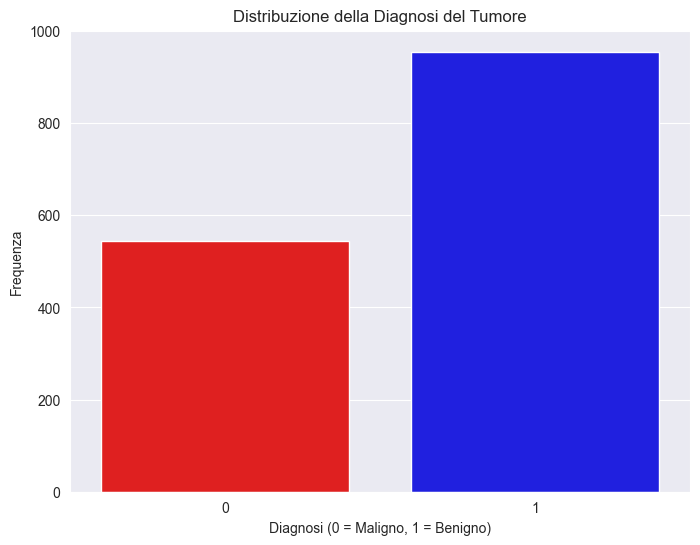

In [4]:
# Ottenere il conteggio e le percentuali per la variabile "target"
conteggio_percentuali = df['target'].value_counts(normalize=True) * 100

# Stampare le percentuali
print("Percentuali di diagnosi:")
print(conteggio_percentuali)


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', palette=['red', 'blue'], hue='target', dodge=False, legend=False)
plt.title('Distribuzione della Diagnosi del Tumore')
plt.xlabel('Diagnosi (0 = Maligno, 1 = Benigno)')
plt.ylabel('Frequenza')
plt.show()

### 2.3 Matrice di Correlazione
La matrice di correlazione è un grafico che mostra le relazioni tra le variabili in un dataset. Permette di identificare facilmente le coppie di variabili che presentano una forte correlazione, sia positiva che negativa.

**Interpretazione:**

* **Colori:**
    * Rosso intenso: Correlazione positiva forte (le variabili aumentano o diminuiscono insieme).
    * Blu intenso: Correlazione negativa forte (le variabili aumentano in una direzione e diminuiscono nell'altra).
    * Bianco/grigio chiaro: Correlazione debole o assente (le variabili non mostrano una relazione lineare significativa).
* **Valori:** I numeri all'interno dei quadrati indicano il coefficiente di correlazione, che varia da -1 a 1.

**Cosa possiamo dedurre:**

* Identificare relazioni tra le variabili.
* Comprendere la direzione della relazione (positiva o negativa).
* Valutare l'intensità della relazione (forte o debole).

**Importante:**

* Correlazione non implica causazione.
* Interpretare nel contesto del dataset specifico.

**Osservazioni:**

* Alcune variabili sono fortemente correlate tra loro, come "mean radius" e "mean texture".
* Altre variabili non sono correlate tra loro, come "radius error" e "worst radius".





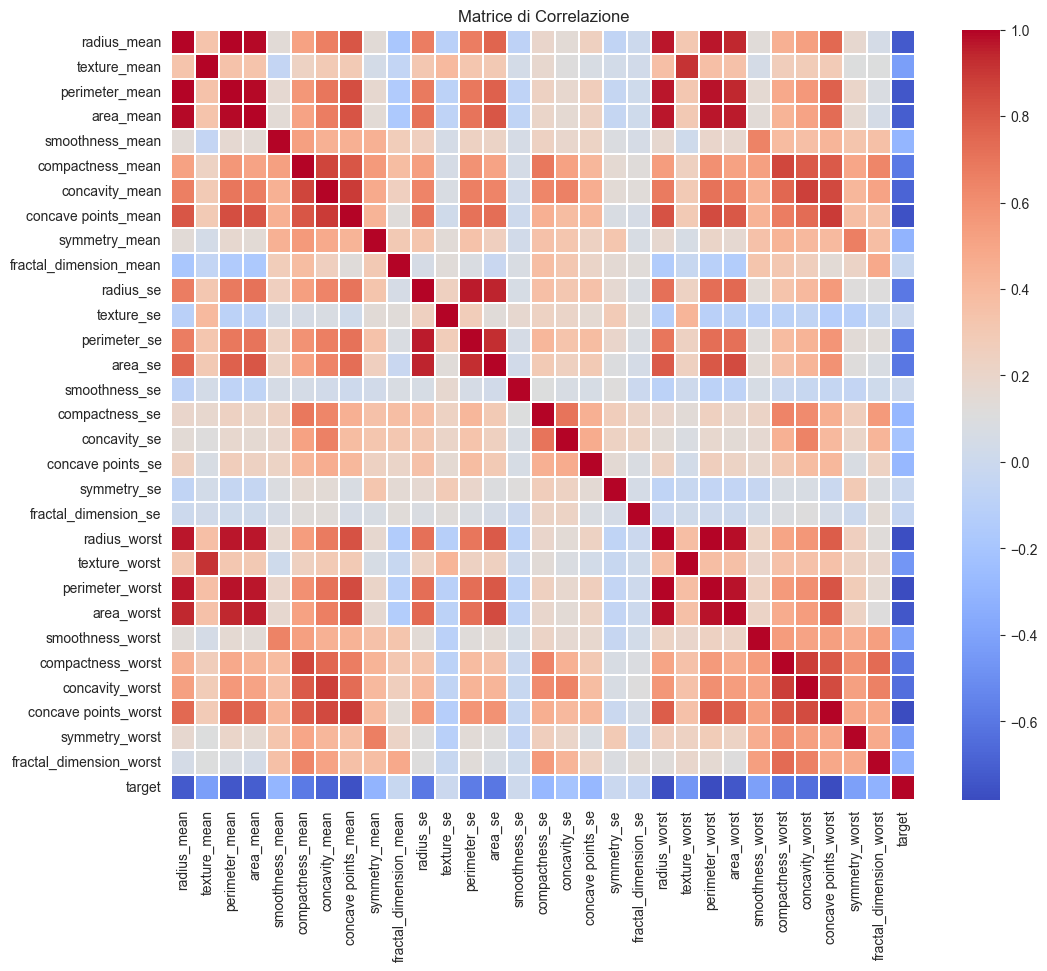

In [5]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Matrice di Correlazione')
plt.show()


### 2.4 Importanza delle Caratteristiche nel Dataset "Breast Cancer Wisconsin"

Questo grafico a barre rappresenta l'importanza delle caratteristiche nel dataset "Breast Cancer Wisconsin". L'importanza è stata calcolata utilizzando un algoritmo Decision Tree.

Le caratteristiche sono ordinate in base alla loro importanza, con la caratteristica più importante in alto. I valori di importanza sono rappresentati da barre colorate.

Dall'analisi del grafico è possibile osservare che alcune caratteristiche sono più importanti di altre per la classificazione dei tumori al seno. Quelle più importanti sono:

* **worst area**
* **worst concave points**
* **mean concave points**
* **worst radius**
* **worst perimeter**

Queste caratteristiche sono probabilmente quelle che forniscono più informazioni sulla natura del tumore e sulla sua probabilità di essere maligno.

L'analisi dell'importanza delle caratteristiche può essere utile per selezionare le caratteristiche più importanti da utilizzare in un modello di machine learning e per comprendere meglio i fattori che influenzano la classificazione dei tumori al seno.

Nei grafici successivi andremo ad analizzare queste 5 feature più importanti.


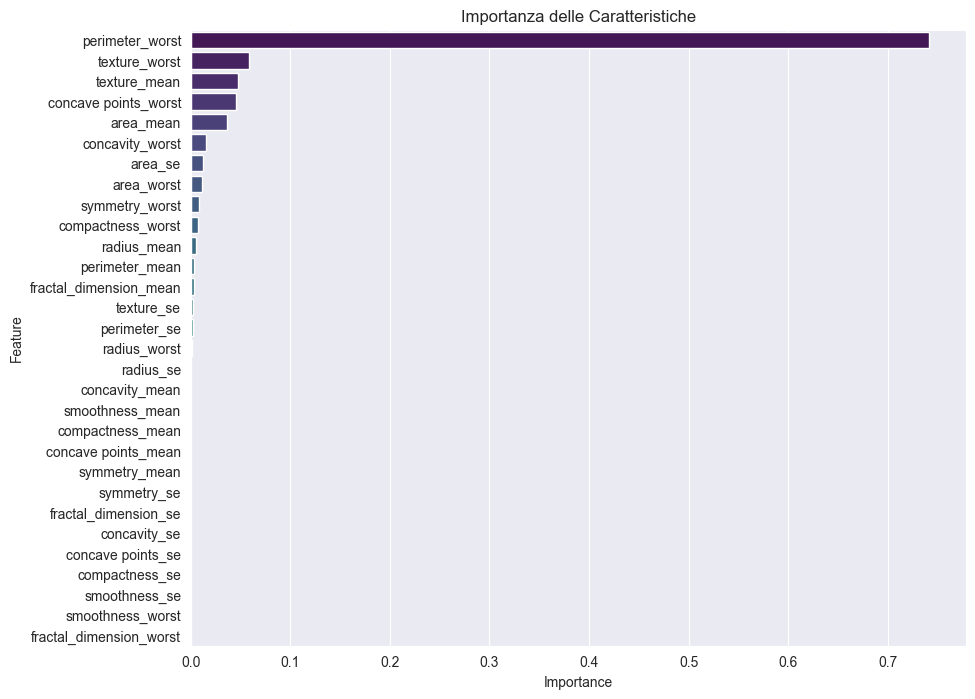

In [6]:
# Dividere i dati in caratteristiche (X) e target (y)
X = df.drop(columns=['target'])
y = df['target']

# Addestrare un modello di RandomForest
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Ottenere l'importanza delle caratteristiche
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizzare l'importanza delle caratteristiche
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', dodge=False, legend=False)
plt.title('Importanza delle Caratteristiche')
plt.show()


In [7]:
#Creo una lista con le prime 5 feature più importanti
topFeaturesByImportance = feature_importance_df[:5]['Feature'].values
print(topFeaturesByImportance)


['perimeter_worst' 'texture_worst' 'texture_mean' 'concave points_worst'
 'area_mean']


### 2.5 Distribuzione delle Caratteristiche più Importanti nel Dataset "Breast Cancer Wisconsin"

Questo set di istogrammi mostra la distribuzione delle cinque caratteristiche più importanti nel dataset "Breast Cancer Wisconsin". Le caratteristiche sono state identificate utilizzando l'algoritmo Decision tree nel precedente passaggio.

Ogni istogramma mostra la distribuzione di una caratteristica per i tumori benigni (colore rosso) e maligni (colore blu). La densità di probabilità è rappresentata da una curva tratteggiata.

**Interpretazione dettagliata:**
* Per tutti i grafici possiamo notare come la distribuzione sia piuttosto marcata tra i due tipi di tumore, infatti queste cinque feature non a caso sono considerate le più importanti, appunto per questa loro caratteristica, possiamo notare che a sinistra dei grafici è presente una concentrazione più marcata di tumori benigni, mentre a destra è presente una concentrazione più marcata di tumori maligni.
**Considerazioni generali:**

* L'analisi di questi istogrammi conferma che le **caratteristiche più importanti** per la classificazione dei tumori al seno sono quelle relative alla **forma e alla dimensione del tumore**. Queste caratteristiche presentano una distribuzione differenziata tra i tumori benigni e maligni, suggerendo che possono essere utilizzate per distinguere tra i due tipi di tumore.
* L'analisi della distribuzione delle caratteristiche può essere utile per:
    * Comprendere meglio la relazione tra le caratteristiche del tumore e la sua natura (benigno o maligno).
    * Identificare potenziali biomarcatori per la diagnosi precoce del cancro al seno.
    * Sviluppare algoritmi di machine learning più efficaci per la classificazione dei tumori al seno.



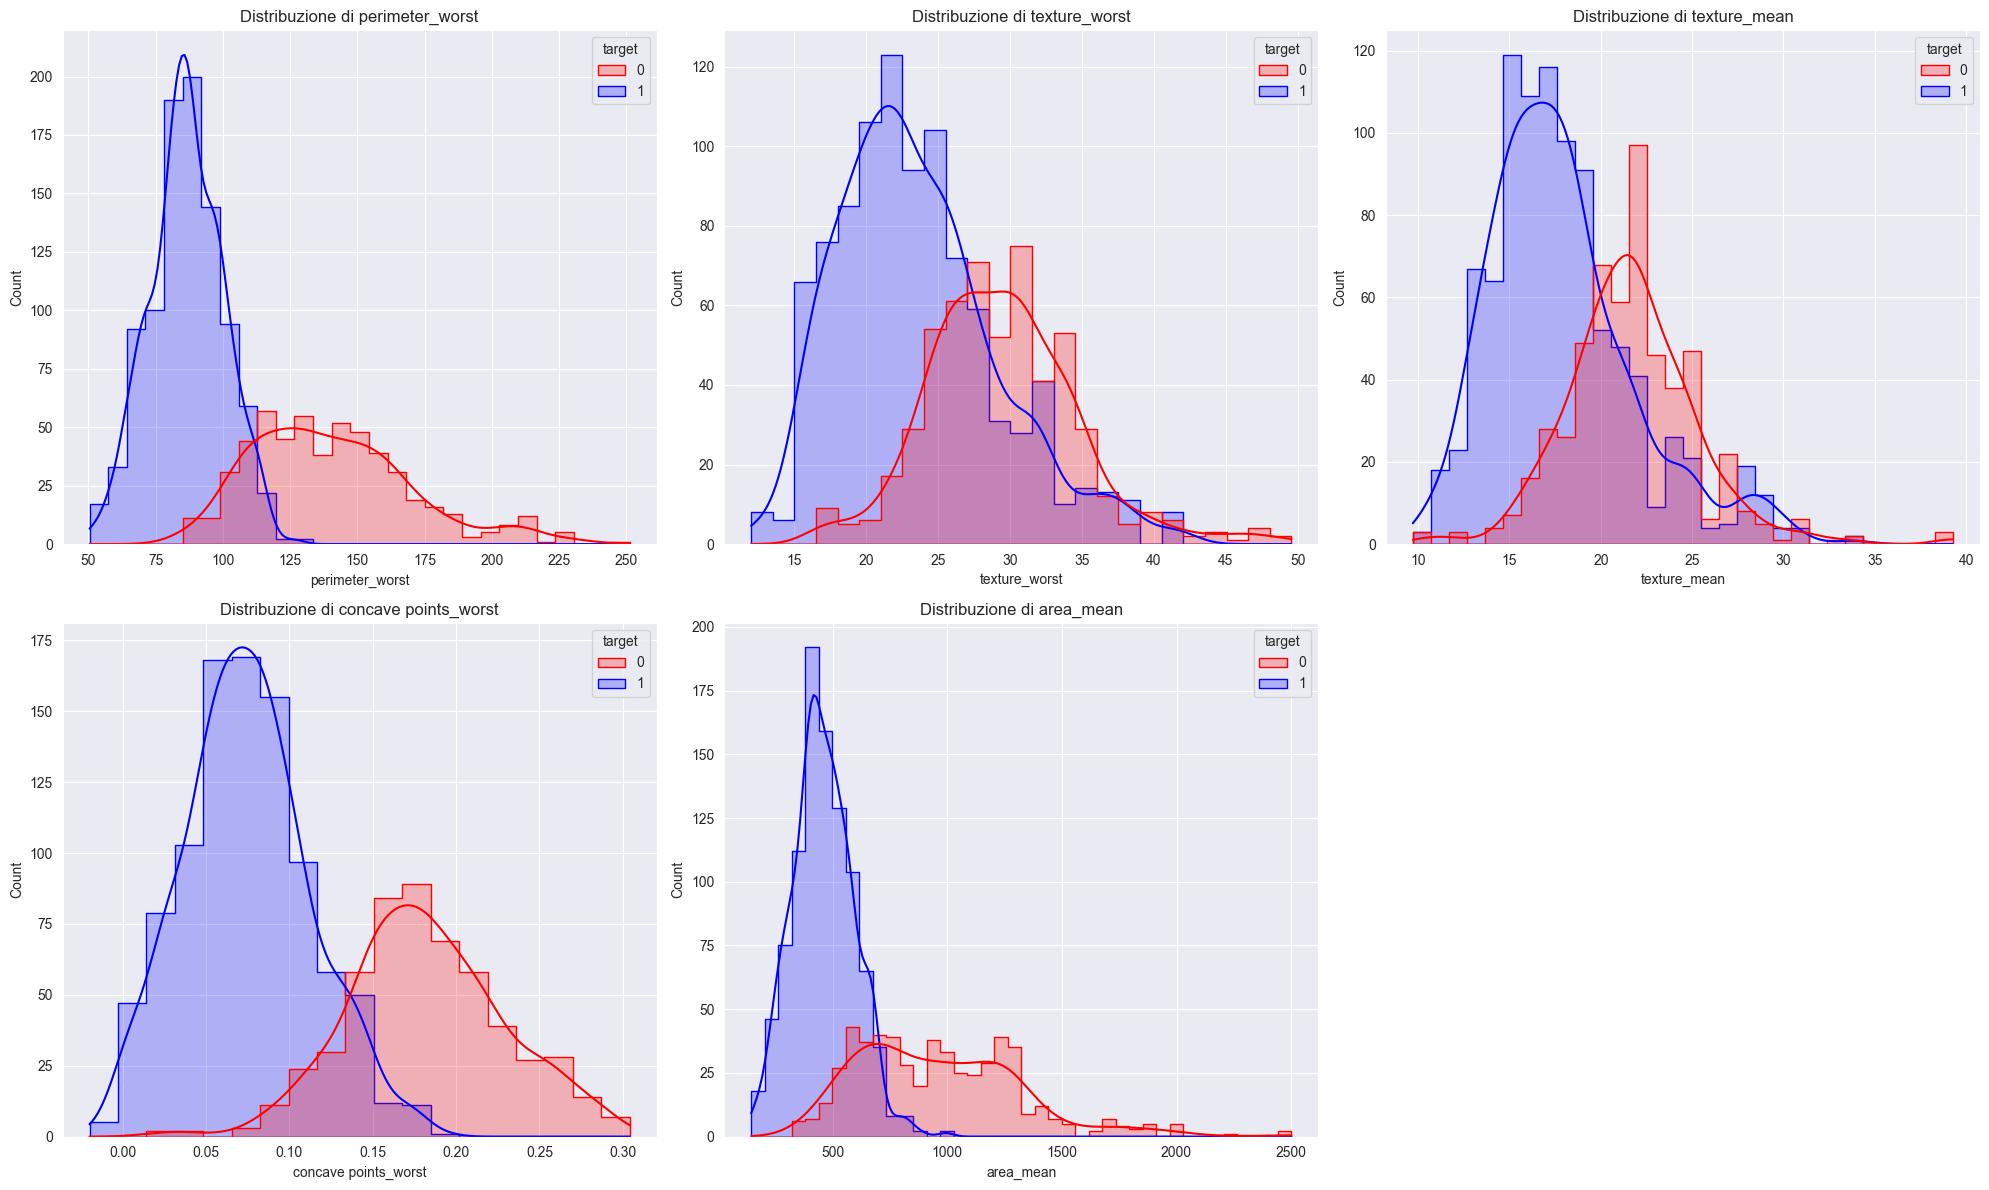

In [8]:
features = topFeaturesByImportance # Prendo le 5 feature più importanti

plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='target', element='step', palette=['red', 'blue'], kde=True)
    plt.title(f'Distribuzione di {feature}')

plt.tight_layout()
plt.show()

### 2.6 Box Plot delle Caratteristiche più Importanti nel Dataset "Breast Cancer Wisconsin"

L'immagine mostra una serie di box plot che rappresentano la distribuzione di diverse caratteristiche per due diversi obiettivi ("target"). I box plot sono suddivisi in due righe e tre colonne. Ogni box plot rappresenta la distribuzione di una singola caratteristica per un singolo obiettivo.

**Elementi del box plot:**

* **Scatola:** La scatola rappresenta la distribuzione centrale dei dati. La linea centrale all'interno della scatola rappresenta la mediana.
* **Whisker:** I baffi si estendono dalla scatola fino al massimo e al minimo valore dei dati che non sono considerati outlier.
* **Outlier:** I punti dati che si trovano al di fuori dei baffi sono considerati outlier e sono rappresentati da punti singoli.

**Interpretazione dei box plot:**

* **Posizione della mediana:** La posizione della mediana all'interno della scatola indica la simmetria della distribuzione dei dati. Se la mediana è al centro della scatola, la distribuzione è simmetrica. Se la mediana è spostata verso un bordo della scatola, la distribuzione è asimmetrica.


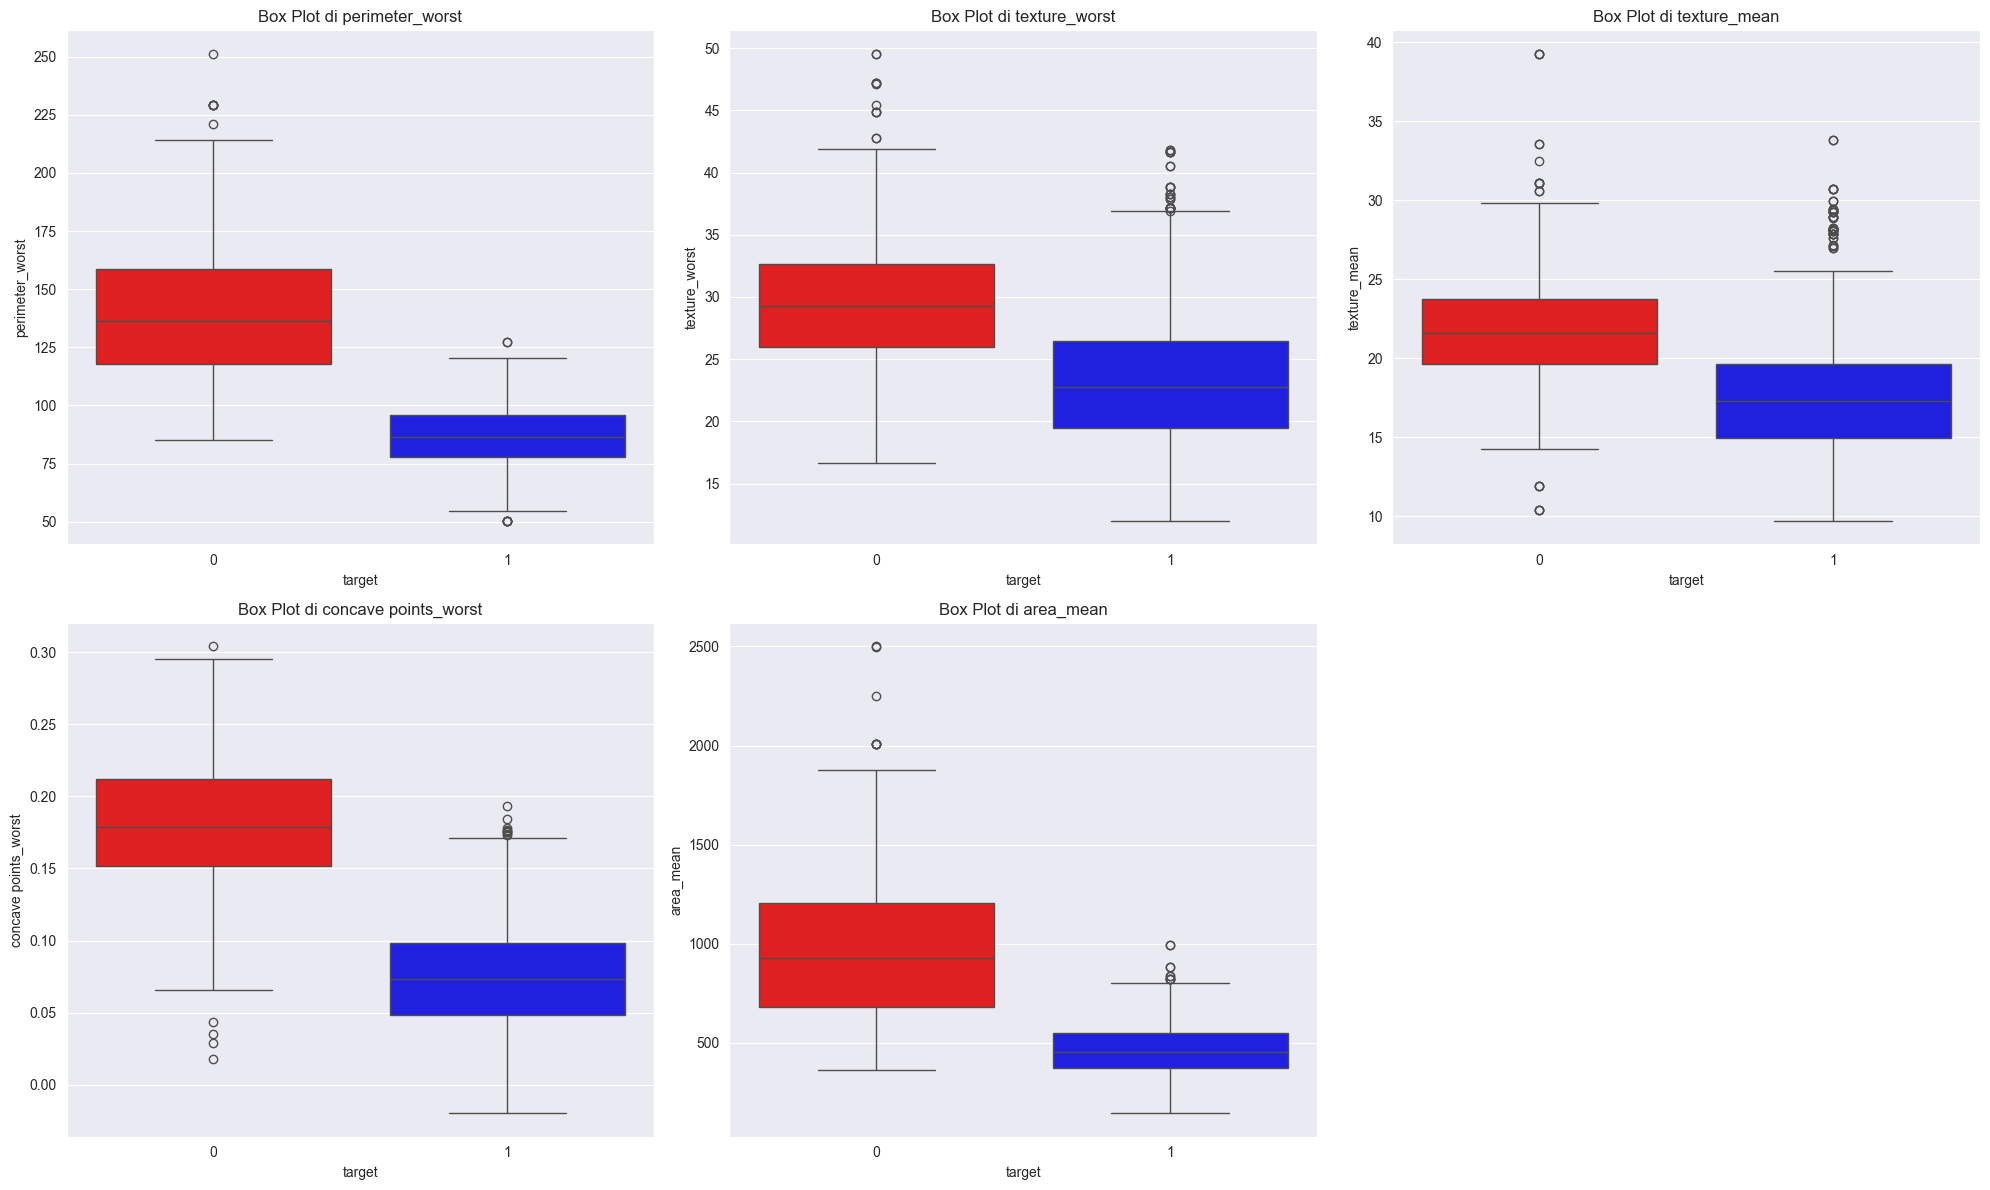

In [9]:
# Analisi esplorativa - Box Plot delle Caratteristiche
features = topFeaturesByImportance

plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette=['red', 'blue'], hue='target', dodge=False, legend=False)
    plt.title(f'Box Plot di {feature}')
plt.tight_layout()
plt.show()

## 3. Eseguo l'algoritmo Decision Tree senza rumore
Il decision tree è un algoritmo di machine learning supervisionato che costruisce un modello predittivo basandosi sull’importanza delle feature nel dataset,
per generare delle regole decisionali, sulla base delle quali costruire una struttura ad albero, dove i nodi interni rappresentano le decisioni, mentre le foglie
i valori delle classi. La capacità di gestire le variabili cliniche e la sua semplicità di lettura e comprensione, sono state fondamentali per la scelta di questo
modello, abbinate alla robustezza che esso possiede anche quando si trova in
situazioni in cui il dataset vede la distribuzione del target sbilanciata.


### 3.1 Split del dataset
Con lo scopo di addestrare il modello, è stata definita la percentuale di dati
da utilizzare per l’addestramento: 70% , mentre la restante parte, il 30 %,
appartiene al set di test del modello. Le dimensioni dei due set sono quindi
di 1050 righe per l’addestramento e 450 per il test, con una distribuzione del
target simile al dataset di partenza:

In [10]:
# Split del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensione del training set (70%):", X_train.shape)
print("Dimensione del test set (30%):", X_test.shape)

Dimensione del training set (70%): (1050, 30)
Dimensione del test set (30%): (450, 30)


#### 3.1.1 Distribuzione dei target positivi e negativi nei set di training e test
Nei grafici sopra riportati, possiamo osservare la distribuzione delle classi del target nei set di training e test. 

- **Training Set**: 
  - Classe `1`: Rappresenta il 37.4% dei dati del training set.
  - Classe `0`: Rappresenta il 62.6% dei dati del training set.

- **Test Set**: 
  - Classe `1`: Rappresenta il 36.8% dei dati del test set.
  - Classe `0`: Rappresenta il 63.2% dei dati del test set.

La distribuzione delle classi è simile tra i due set, con una leggera predominanza della classe `0` in entrambi. Questo indica che il campionamento casuale effettuato con `train_test_split` ha mantenuto una distribuzione proporzionale delle classi tra training e test set, garantendo una buona rappresentatività dei dati nel processo di validazione del modello.


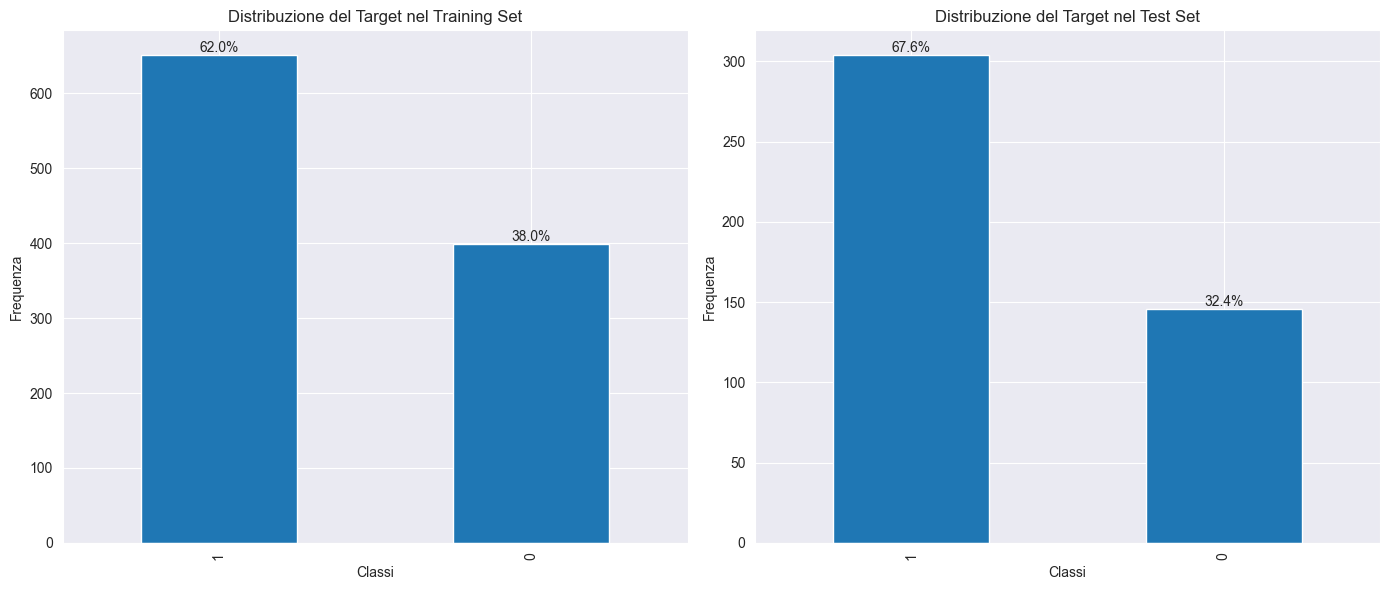

In [11]:
# Conta le occorrenze di ogni classe nel training set e nel test set
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Calcola le percentuali
train_percentages = (train_counts / train_counts.sum()) * 100
test_percentages = (test_counts / test_counts.sum()) * 100

# Crea una figura e assi per i due grafici
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Grafico per il training set
train_counts.plot(kind='bar', ax=ax[0])
for i, (count, percentage) in enumerate(zip(train_counts, train_percentages)):
    ax[0].text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')
ax[0].set_title('Distribuzione del Target nel Training Set')
ax[0].set_xlabel('Classi')
ax[0].set_ylabel('Frequenza')

# Grafico per il test set
test_counts.plot(kind='bar', ax=ax[1])
for i, (count, percentage) in enumerate(zip(test_counts, test_percentages)):
    ax[1].text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')
ax[1].set_title('Distribuzione del Target nel Test Set')
ax[1].set_xlabel('Classi')
ax[1].set_ylabel('Frequenza')

# Mostra i grafici
plt.tight_layout()
plt.show()


### 3.2 Modello Decision tree

#### 3.2.1 Addestramento del modello Decision tree

In [12]:
# Creiamo e addestriamo il modello di Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 3.2.2 Valutazione del modello Decision Tree Classifier
In seguito all’addestramento del modello, avvenuto in un tempo di 0,003s, sono stati calcolati i parametri di qualità del modello: Accuratezza, Precisione,
Recall, F1_score e Curva roc con annessa AUC, con l’intento di paragonarli
ai valori del modello addestrati con dati che presentano rumore.
* Accuracy: 96,22% - Il modello è in grado di classificare la quasi totalità
dei campioni in modo corretto
* Precision: 97,04% - La percentuale di predizioni positive corrette
* Recall: 97,36% - Capacità del modello di identificare correttamente i
casi positivi molto alta
* F1_score: 97,20% - Alta capacità di ridurre i falsi positivi ed identificare
i positivi reali.

Il modello restituisce punteggi molto alti in tutte le metriche. Particolare attenzione, in questo caso, viene data al valore di Recall, perchè con un
valore così alto è possibile minimizzare il numero di falsi negativi, che soprattutto in un contesto medico è molto importante che vengano evitati o
minimizzati.

In [13]:
#Avvio cronometro
start_time = time.time()

# Facciamo previsioni sul test set
y_pred = clf.predict(X_test)

#Stoppo cronometro
end_time = time.time()

# Valutiamo le performance del modello
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

# Calcola e stampa il classification report
class_report = classification_report(y_test, y_pred)

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

elapsed_time_notModifiedDataset = end_time - start_time
print(f"Tempo trascorso: {elapsed_time_notModifiedDataset:.4f} secondi")


Accuracy: 0.9622222222222222
Precision: 0.9704918032786886
Recall: 0.9736842105263158
F1: 0.9720853858784894
Tempo trascorso: 0.0010 secondi


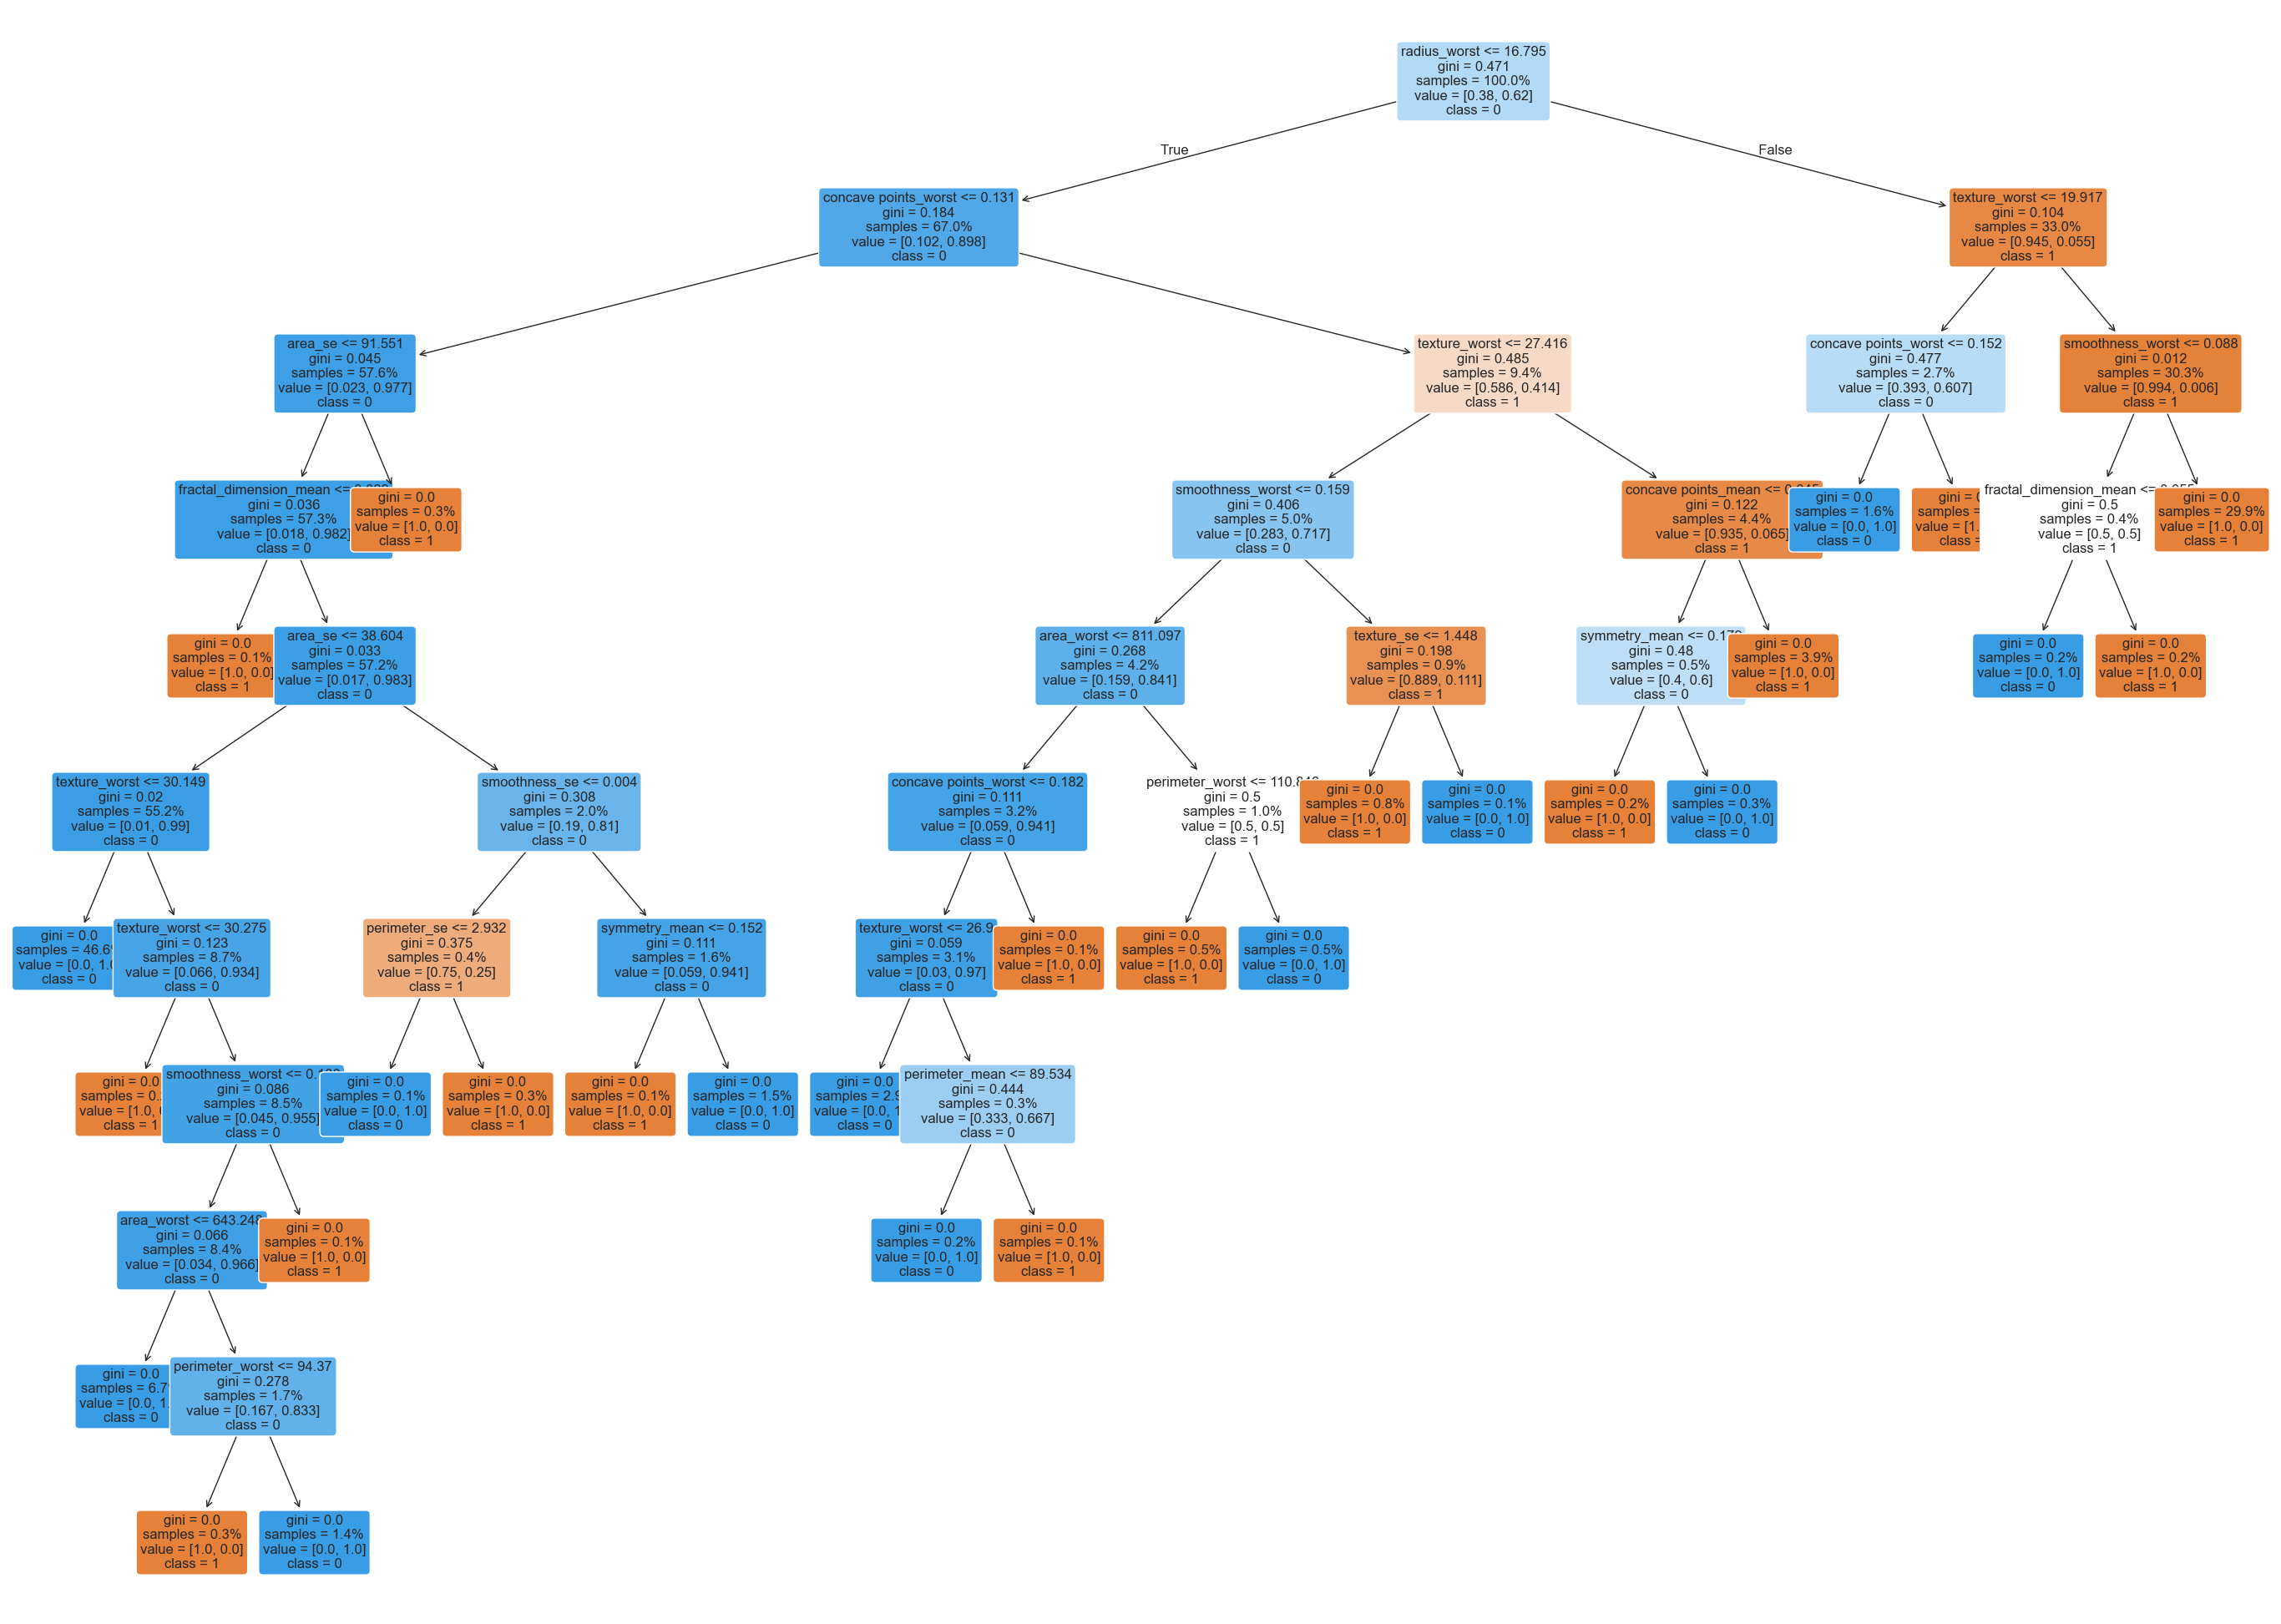

In [14]:
from sklearn import tree
plt.figure(figsize=(35, 25))

# Visualizza l'albero decisionale
tree.plot_tree(clf, 
               feature_names=X_train.columns, 
               class_names=[str(c) for c in y_train.unique()] , 
               filled=True,  # Colorazione dei nodi in base alla classe
               rounded=True,# Angoli arrotondati
               proportion=True,
               fontsize=12)  # Dimensione del font

# Mostra il grafico
plt.show()

### 3.3 Valutazione della confusion matrix

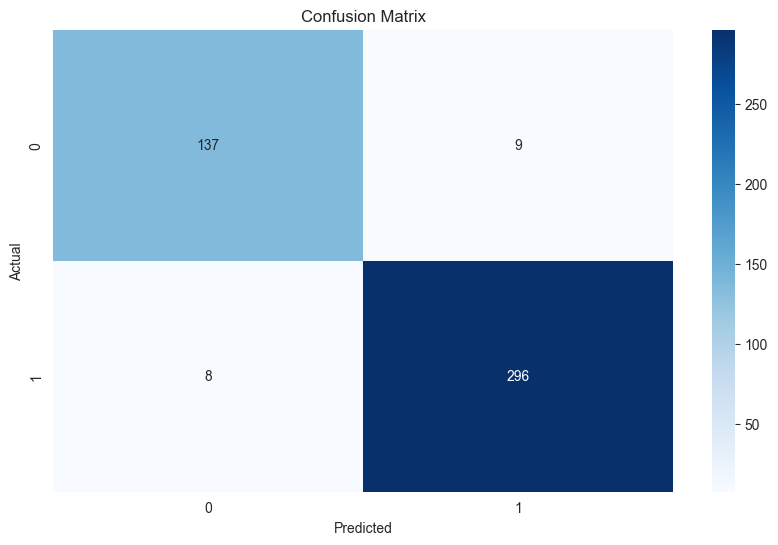

In [15]:
# Visualizza la matrice di confusione con seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3.4 Classification report

In [16]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       146
           1       0.97      0.97      0.97       304

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



### 3.5 Metodo k-fold cross validation
Con lo scopo di migliorare la precisione del calcolo delle metriche del modello, si è deciso di applicare la k-cross fold validation con un valore di k
pari a 10. In questo modo i dati vengono in k sottoinsiemi e il modello viene addestrato sul sottoinsieme rimanente al fine di ottenere una valutazione
più robusta che evita l’impatto di particolarità del set di addestramento

In [17]:
from sklearn.model_selection import KFold
import copy
def kfold(x_train , y_train , k):
    dtc= copy.deepcopy(clf)
    n_fold=k
    fold = KFold(n_splits=n_fold, shuffle=True , random_state=42)
    #array in cui inserire risultati
    accuracy_fold_dt = []
    precision_fold_dt = []
    recall_fold_dt = []
    f1_fold_dt = []
    for n_fold, (train_index , test_index) in enumerate(fold.split(x_train , y_train)):
        x_train_fold , x_test_fold = X_train.iloc[train_index] , X_train.iloc[test_index]
        y_train_fold , y_test_fold = y_train.iloc[train_index] , y_train.iloc[test_index]
        dtc.fit(x_train_fold , y_train_fold)
        pred_y_test_fold = dtc.predict(x_test_fold)
        accuracy_fold_dt.append(accuracy_score(y_test_fold , pred_y_test_fold))
        precision_fold_dt.append(precision_score(y_test_fold , pred_y_test_fold))
        recall_fold_dt.append(recall_score(y_test_fold , pred_y_test_fold))
        f1_fold_dt.append(f1_score(y_test_fold , pred_y_test_fold))
    
    return accuracy_fold_dt,precision_fold_dt,recall_fold_dt , f1_fold_dt

Applicazione k-fold cross validation

In [18]:
accuracy_fold , precision_fold , recall_fold , f1_fold = kfold(X_train, y_train, 10)    
print('-------------------------------------------')
print('Media accuratezza: ' , np.mean(accuracy_fold))
print('Media precisione: ' , np.mean(precision_fold))
print('Media recall: ' , np.mean(recall_fold))
print('Media f1_score: ' , np.mean(f1_fold))


-------------------------------------------
Media accuratezza:  0.959047619047619
Media precisione:  0.9740954838428204
Media recall:  0.9601304350000085
Media f1_score:  0.9667925137185946


Paragonando i valori, si può notare un lieve calo per quanto riguarda accuratezza, precisione e f1 score, mentre un leggero miglioramento del parametro
di precisione, indicando una buona precisione nelle predizioni.


### 3.6 Curva ROC

La curva ROC è uno strumento grafico che permette di valutare le prestazioni
del modello, grazie alla valutazione della forma della curva e al valore dell’area
che vi è sotto alla curva (AUC:Area Under the Curve). Un alto valore della
AUC e il grafico che si avvicina all’angolo in alto a sinistra indicano che il
modello ha buone capacità predittive, con un alto tasso di veri positivi ed un
basso tasso di falsi positivi

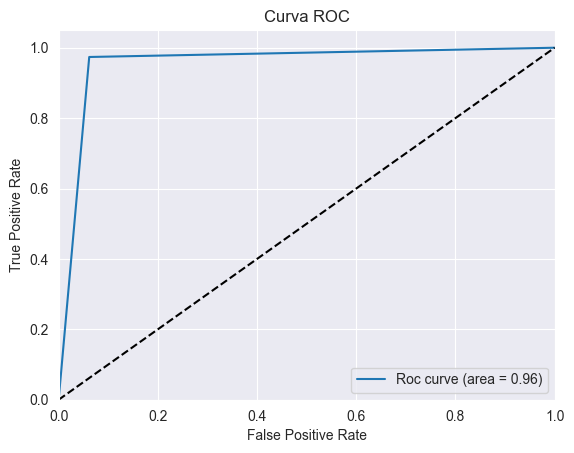

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
#array che contiene probabilità predette che ogni campione appartenga a classe positiva
y_pred_prob = clf.predict_proba(X_test)[:, 1]
#calcolo della curva ROC
fpr_dt , tpr_dt , threshold_dt = roc_curve(y_test , y_pred)
#calcolo area under the curve (AUC)
roc_auc_dt = roc_auc_score(y_test , y_pred)

#Disegna curva roc
plt.plot(fpr_dt , tpr_dt , label='Roc curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Come si può notare, i valori della AUC sono molto elevati: 0,96, a fronte di
un valore massimo di 1, mentre la curva si avvicina molto all’angolo in alto a
sinistra del grafico, denotando così, una buona capacità di predizione.

### 3.7 Feature più importanti per il modello addestrato sui dati di training


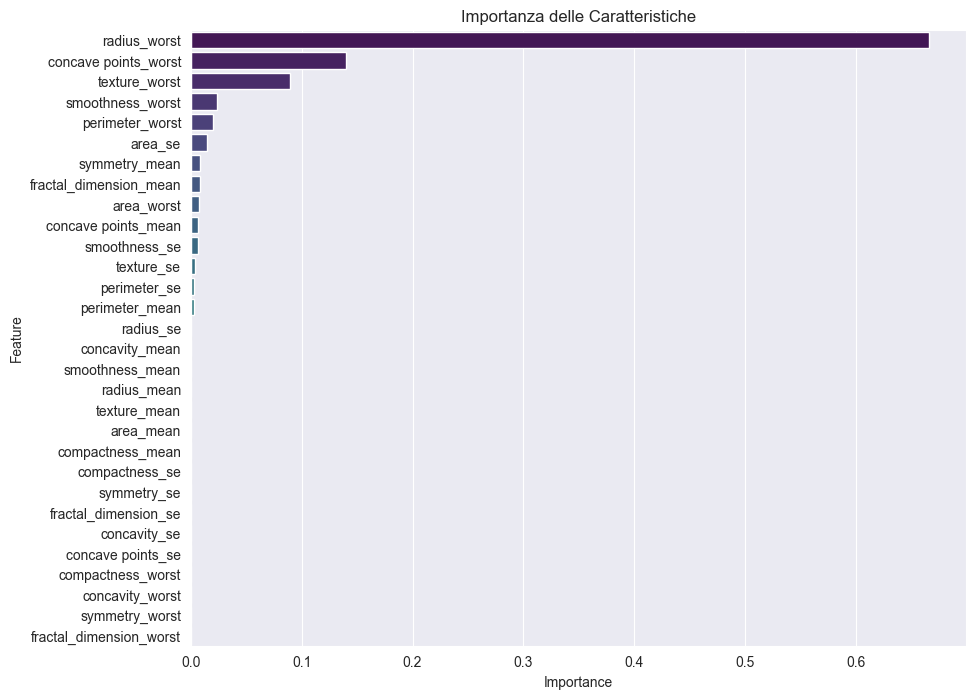

In [20]:
# Ottenere l'importanza delle caratteristiche
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizzare l'importanza delle caratteristiche
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', dodge=False, legend=False)
plt.title('Importanza delle Caratteristiche')
plt.show()


### 3.8 Correlazione delle feature con il target
Da questa rappresentazione possiamo notare come sono molteplici le feature
con una alta correlazione con il target

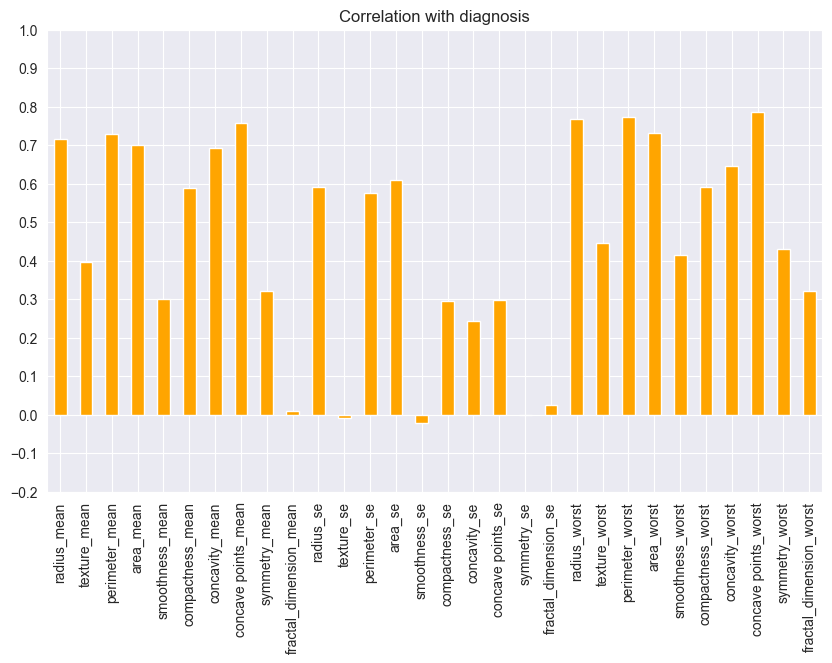

In [21]:
y_train_corr = y_train.map({0: 1, 1: 0})
X_train.corrwith(y_train_corr).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with diagnosis",color="orange")

plt.yticks(np.arange(-0.2, 1.1, 0.1))
plt.show()

## 4. Aggiunta di rumore al dataset
Come precedentemente introdotto, l’obiettivo di questo studio è quello di
analizzare il comportamento del modello di classificazione e i cambiamenti
che esso può subire a fronte dell’aggiunta di rumore all’interno dei dati di
addestramento. A tale scopo si è deciso di introdurre i seguenti tre tipi di
rumore all’interno del set di dati di addestramento: Outliers, Valori nulli,
Righe duplicate.


Per introdurre il rumore nei dati, sono state create copie del set di addestramento del modello. Per ogni tipo e per ogni percentuale di rumore, è stata
realizzata una copia separata del dataset. Questo approccio ha permesso di
applicare il rumore in modo controllato e progressivo, facilitando un’analisi
dettagliata degli effetti di ciascun tipo e livello di rumore sulle prestazioni del
modello. La decisione sulla scelta delle percentuali è ricaduta su un approccio
incrementale ispirato ad un approccio esponenziale: partendo dall’aggiunta
dei dati alterati in bassissime percentuali vicine vicine tra loro, fino ad arrivare a valori alti, con i seguenti valori inseriti nell’array percentuali_rumore:
1% , 2% , 3% , 50% , 100% In questo modo si vuole catturare la panoramica
sull’andamento dei comportamenti del modello sin dalla minima introduzione
dei valori alterati, per vedere come ne viene influenzato.

### 4.1 Metodo introduzione dati mancanti

In [22]:
def introduce_missing_data_custom(dataset, columns, percentage):
    """
    Introduce valori nulli in un dataset specificando le colonne e la percentuale di dati da annullare.

    :param dataset: DataFrame su cui operare.
    :param columns: Lista delle colonne su cui introdurre i valori nulli.
    :param percentage: Percentuale dei dati da annullare (0-1).
    :return: DataFrame modificato.
    """
    # Calcola il numero di righe da annullare in base alla percentuale
    num_rows_to_null = int(len(dataset) * percentage)

    # Seleziona casualmente le righe da annullare
    rows_to_null = np.random.choice(dataset.index, num_rows_to_null, replace=False)
    #print("Vado a sporcare queste righe: ", rows_to_null)
    
    # Imposta i valori a NaN per le colonne specificate nelle righe selezionate
    dataset.loc[rows_to_null, columns] = np.nan

    return dataset

### 4.2 Metodo introduzione outliers

In [23]:
def introduce_outliers(dataset, columns, percentage):
    """
    Introduce outliers in un dataset specificando le colonne e la percentuale di dati da modificare.

    :param dataset: DataFrame su cui operare.
    :param columns: Lista delle colonne su cui introdurre gli outliers.
    :param percentage: Percentuale dei dati da modificare (0-1).
    :return: DataFrame modificato.
    """
    # Calcola il numero di righe da modificare in base alla percentuale
    num_rows_to_change = int(len(dataset) * percentage)

    # Seleziona casualmente le righe da modificare
    rows_to_change = np.random.choice(dataset.index, num_rows_to_change, replace=False)
    #print("Vado a modificare queste righe: ", rows_to_change)

    # Per ogni riga selezionata, aggiungi un outlier alle colonne specificate
    for idx in rows_to_change:
        for column in columns:
            # Calcola un outlier come media + 5 * deviazione standard della colonna
            outlier_value = dataset[column].mean() + 5 * dataset[column].std()
            dataset.at[idx, column] = outlier_value

    return dataset

### 4.3 Metodo introduzione righe duplicate

In [24]:
def introduce_duplicate_rows(dataset, percentage, y_train_spor):
    """
    Introduce righe duplicate in un dataset specificando la percentuale di righe da duplicare.
    Duplica anche le etichette corrispondenti in y_train_sporcata.

    :param dataset: DataFrame su cui operare.
    :param percentage: Percentuale di righe da duplicare (0-1).
    :param y_train_sporcata: Serie delle etichette corrispondenti.
    :return: DataFrame e Serie modificati.
    """
    # Calcola il numero di righe da duplicare in base alla percentuale
    num_rows_to_duplicate = int(len(dataset) * percentage)

    # Seleziona casualmente le righe da duplicare
    rows_to_duplicate = np.random.choice(dataset.index, num_rows_to_duplicate, replace=False)

    # Duplica le righe selezionate
    duplicated_rows = dataset.loc[rows_to_duplicate]
    dataset = pd.concat([dataset, duplicated_rows], ignore_index=True)

    # Duplica le etichette corrispondenti
    duplicated_labels = y_train_spor.loc[rows_to_duplicate]
    y_train_spor = pd.concat([y_train_spor, duplicated_labels], ignore_index=True)

    return dataset, y_train_spor

### 4.4 Metodo confronto distribuzione feature tra dataset pulito e sporcato

In [25]:
def plot_feature_distribution_comparison(clean_df, noisy_df, feature_columns, top5Feature):
    """
    Confronta graficamente la distribuzione delle feature tra il dataset pulito e quello sporcato.

    :param clean_df: DataFrame del dataset pulito.
    :param noisy_df: DataFrame del dataset sporcato.
    :param feature_columns: Colonne delle feature da confrontare.
    :param top5Feature: Lista delle top 5 feature da mostrare.
    """
    # Crea copie dei DataFrame per evitare di modificare gli originali
    clean_df_copy = clean_df.copy()
    noisy_df_copy = noisy_df.copy()

    # Aggiungi una colonna per indicare lo stato (pulito o sporcato)
    clean_df_copy['status'] = 'clean'
    noisy_df_copy['status'] = 'noisy'

    # Seleziona solo le colonne delle top 5 feature
    feature_columns_to_plot = [col for col in feature_columns if col in top5Feature]

    # Concatena i due dataset
    combined_df = pd.concat([clean_df_copy, noisy_df_copy], ignore_index=True)

    # Calcola il numero di righe e colonne dei subplot in base al numero di feature da plottare
    num_features = len(feature_columns_to_plot)
    num_rows = (num_features + 2) // 3  # Calcola il numero di righe necessarie (3 colonne per riga)

    # Plotting
    plt.figure(figsize=(15, 5 * num_rows))  # Altezza ridotta per ridurre la dimensione complessiva del grafico
    sns.set(style="whitegrid")

    for i, column in enumerate(feature_columns_to_plot, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x='status', y=column, data=combined_df)
        plt.title(column)
        plt.tight_layout()

    plt.suptitle('Confronto tra Dataset Pulito e Sporcato', y=1.02, fontsize=16, ha='center')
    plt.show()

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test , y_pred_prob[: , 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

## 5. Esecuzione dell'algoritmo Decision Tree con rumore dinamico dal 1% al 100%
Il rumore viene introdotto sul dataset X_test, che abbiamo creato in precedenza e solo sulle top 5 colonne più importanti che vengono calcolate a inizio notebook nel paragrafo 2.4.

Percentuali di rumore: 1% , 2% , 3% , 50% , 100%

In [45]:
percentuali_rumore = [0.01,0.02,0.03,0.5,1]

### 5.1 Esecuzione Decision Tree con aggiunta di valori nulli
In questa sezione si analizzeranno le prestazioni del modello in seguito all’alterazione delle feature più importanti, che verranno rese nulle seguendo le
percentuali pre-indicate.

Percentuale di rumore: 0.01. Accuracy: 0.9644444444444444, AUC: 0.9612247656813266
F1 Score: 0.9645067091743188, Precision: 0.9646116977905057, Recall: 0.9644444444444444



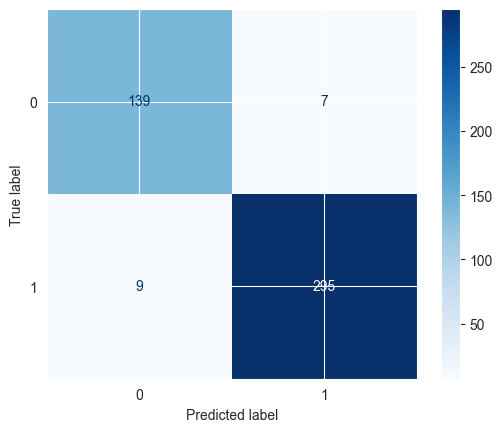

K-FOLD: ----------------------------
Percentuale di rumore: 0.02. Accuracy: 0.9622222222222222, AUC: 0.95780010814708
F1 Score: 0.9622555709866999, Precision: 0.9622996041100709, Recall: 0.9622222222222222



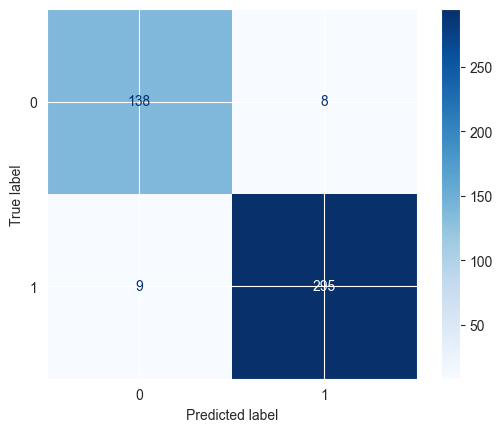

K-FOLD: ----------------------------
Percentuale di rumore: 0.03. Accuracy: 0.9666666666666667, AUC: 0.962869502523432
F1 Score: 0.9666960920470881, Precision: 0.966736265463281, Recall: 0.9666666666666667



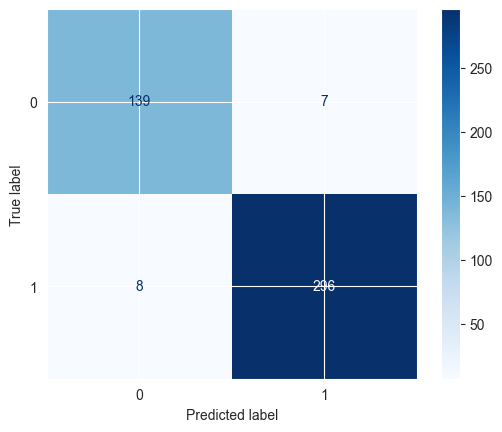

K-FOLD: ----------------------------
Percentuale di rumore: 0.5. Accuracy: 0.9755555555555555, AUC: 0.9730082912761354
F1 Score: 0.9755771341678645, Precision: 0.9756095881697013, Recall: 0.9755555555555555



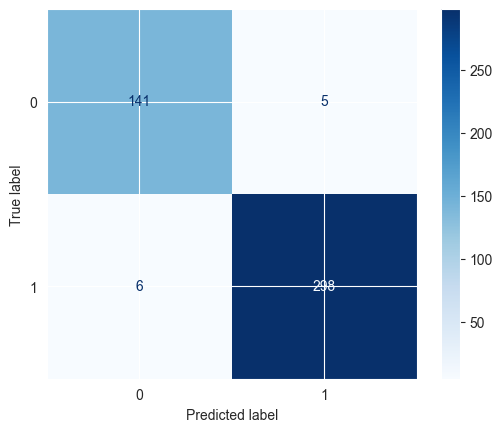

K-FOLD: ----------------------------
Percentuale di rumore: 1. Accuracy: 0.9733333333333334, AUC: 0.9660237923576064
F1 Score: 0.973235294117647, Precision: 0.9733138223279068, Recall: 0.9733333333333334



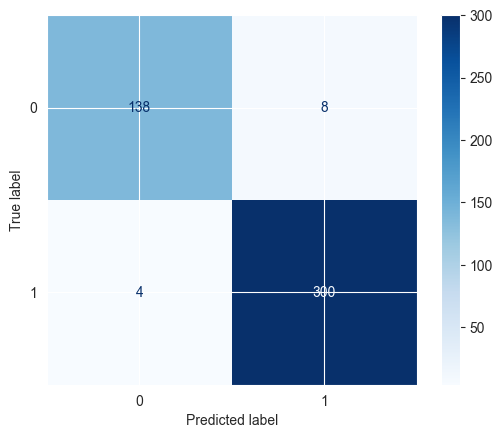

K-FOLD: ----------------------------


In [28]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Aggiungi le metriche ROC al dizionario delle metriche
metricsNUll = {
    'percentuale': [],
    'accuracy': [],
    'f1_score': [],
    'precision': [],
    'recall': [],
    'fpr': [],   # False Positive Rate
    'tpr': [],   # True Positive Rate
    'roc_auc': [] # Area Under the Curve
}
datasetSporcatoNULL = {'percentuale': [], 'dataset': []}

for percentuale in percentuali_rumore:
    dataset_sporcato = introduce_missing_data_custom(X_train.copy(), topFeaturesByImportance, percentuale)
    
    datasetSporcatoNULL['dataset'].append(dataset_sporcato)
    datasetSporcatoNULL['percentuale'].append(percentuale * 100)
    
    # Creiamo e addestriamo il modello di Decision Tree
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(dataset_sporcato, y_train)

    # Effettua le previsioni sui dati di test
    y_pred_prob = clf.predict_proba(X_test)  # Probabilità predette
    y_pred = clf.predict(X_test)

    # Calcola le metriche di performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcola le curve ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])  # Assumendo binario e la classe positiva è la seconda
    roc_auc = auc(fpr, tpr)

    # Salva le metriche
    metricsNUll['percentuale'].append(percentuale)
    metricsNUll['accuracy'].append(accuracy)
    metricsNUll['f1_score'].append(f1)
    metricsNUll['precision'].append(precision)
    metricsNUll['recall'].append(recall)
    metricsNUll['fpr'].append(fpr)
    metricsNUll['tpr'].append(tpr)
    metricsNUll['roc_auc'].append(roc_auc)

    print(f'Percentuale di rumore: {percentuale}. Accuracy: {accuracy}, AUC: {roc_auc}\n'
          f'F1 Score: {f1}, Precision: {precision}, Recall: {recall}\n')
    plot_confusion_matrix(clf)
    
    print('K-FOLD: ----------------------------')


### 5.2 Esecuzione Decision Tree con aggiunta di outliers
In questa sezione si analizzeranno le prestazioni del modello in seguito all’alterazione delle feature più importanti, che verranno rese outliers seguendo le
percentuali pre-indicate.

Percentuale di rumore: 0.01. Accuracy: 0.9622222222222222, AUC: 0.952460346070656
F1 Score: 0.962047216743433, Precision: 0.9621449501556918, Recall: 0.9622222222222222



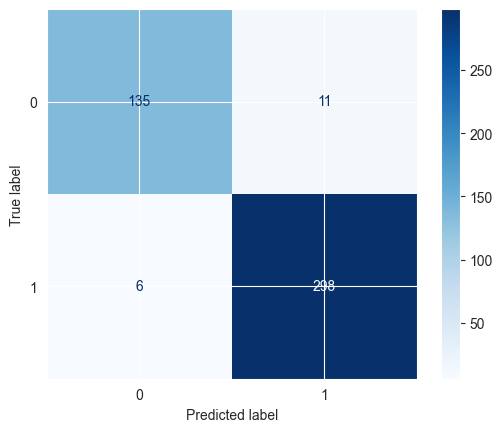

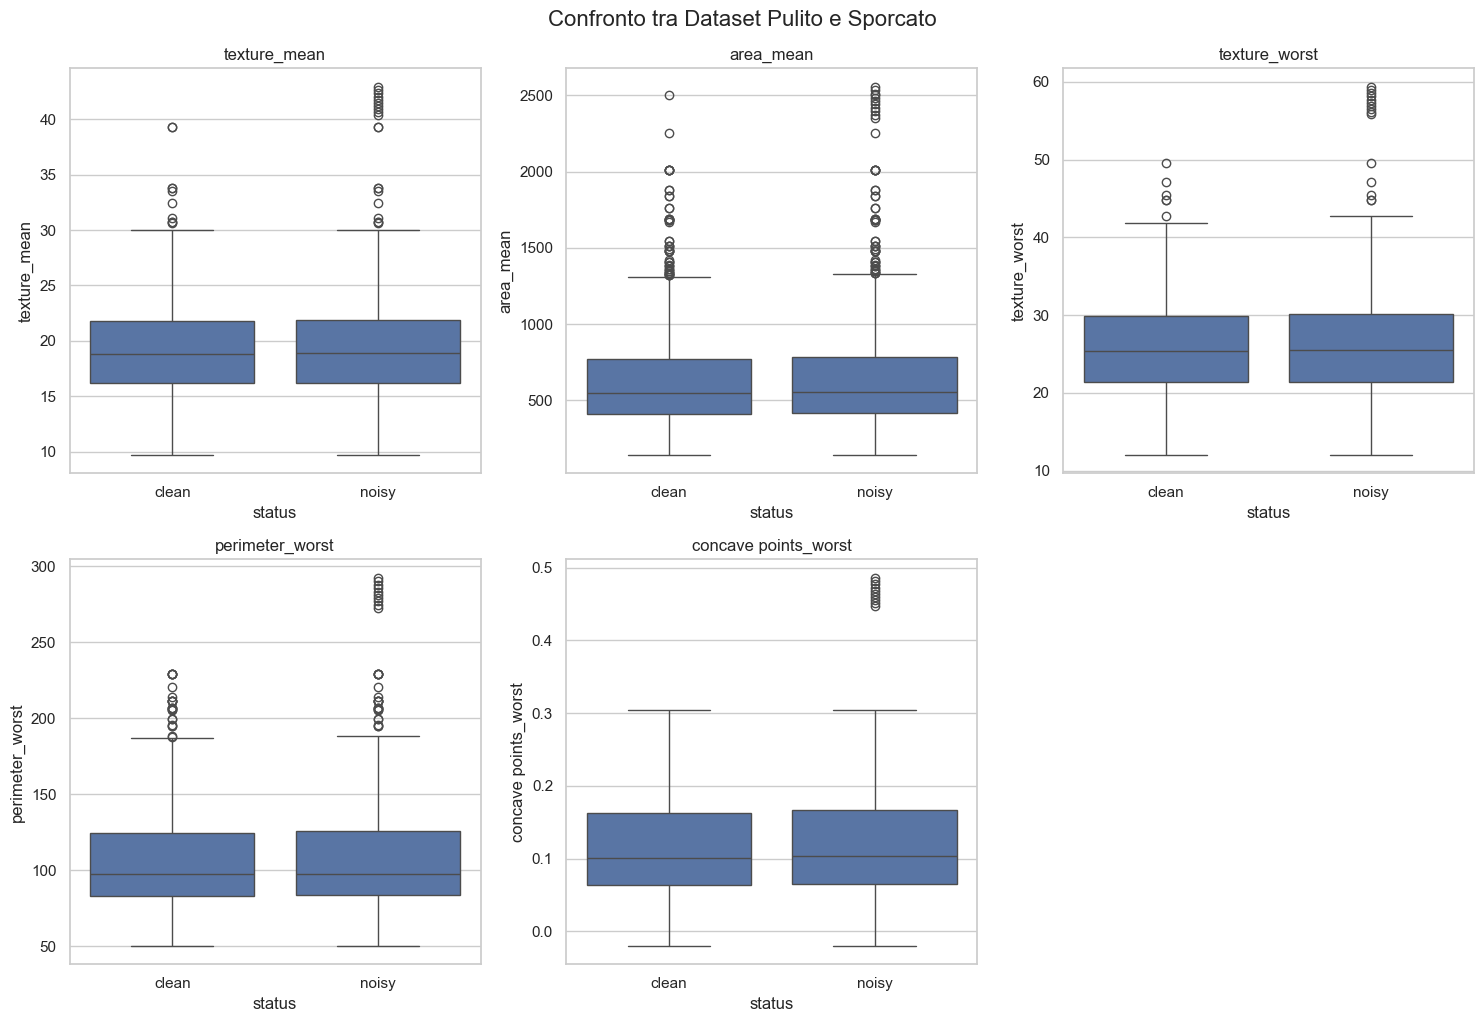

Percentuale di rumore: 0.02. Accuracy: 0.9666666666666667, AUC: 0.9664293439077145
F1 Score: 0.9668090523811916, Precision: 0.9672166973059573, Recall: 0.9666666666666667



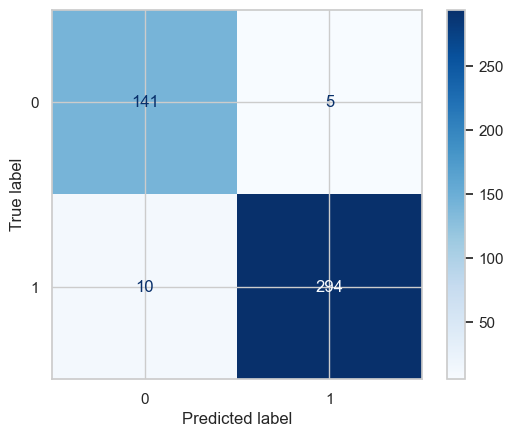

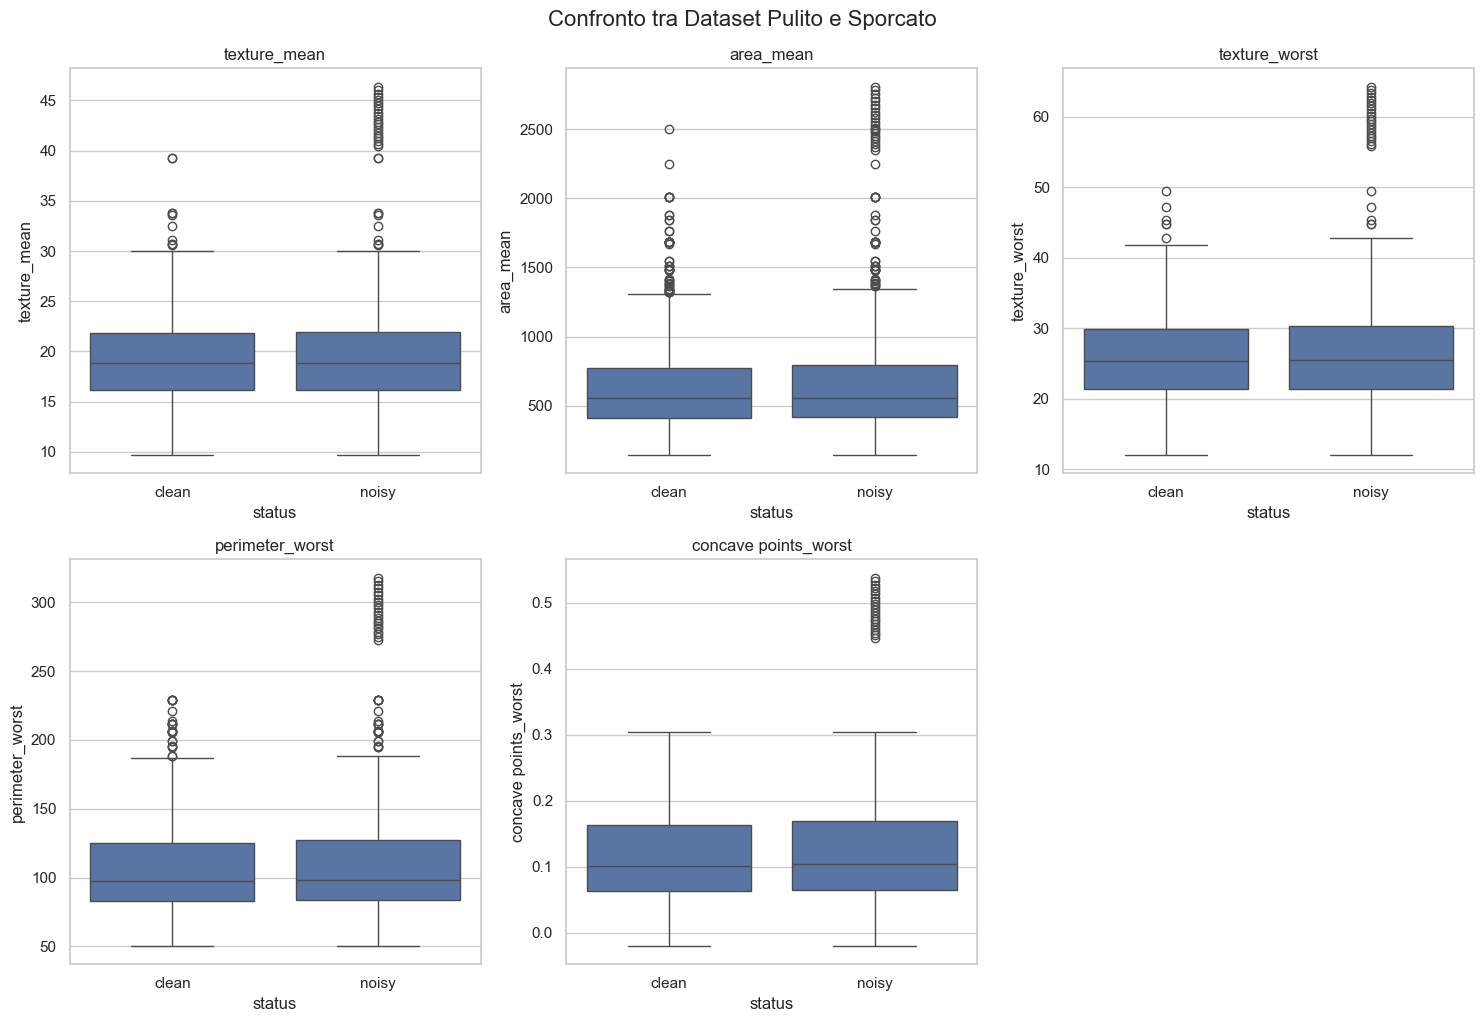

Percentuale di rumore: 0.03. Accuracy: 0.9666666666666667, AUC: 0.9646494232155733
F1 Score: 0.9667535135639912, Precision: 0.9669364608649766, Recall: 0.9666666666666667



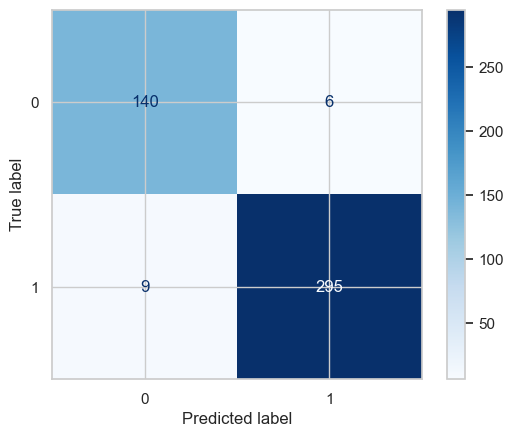

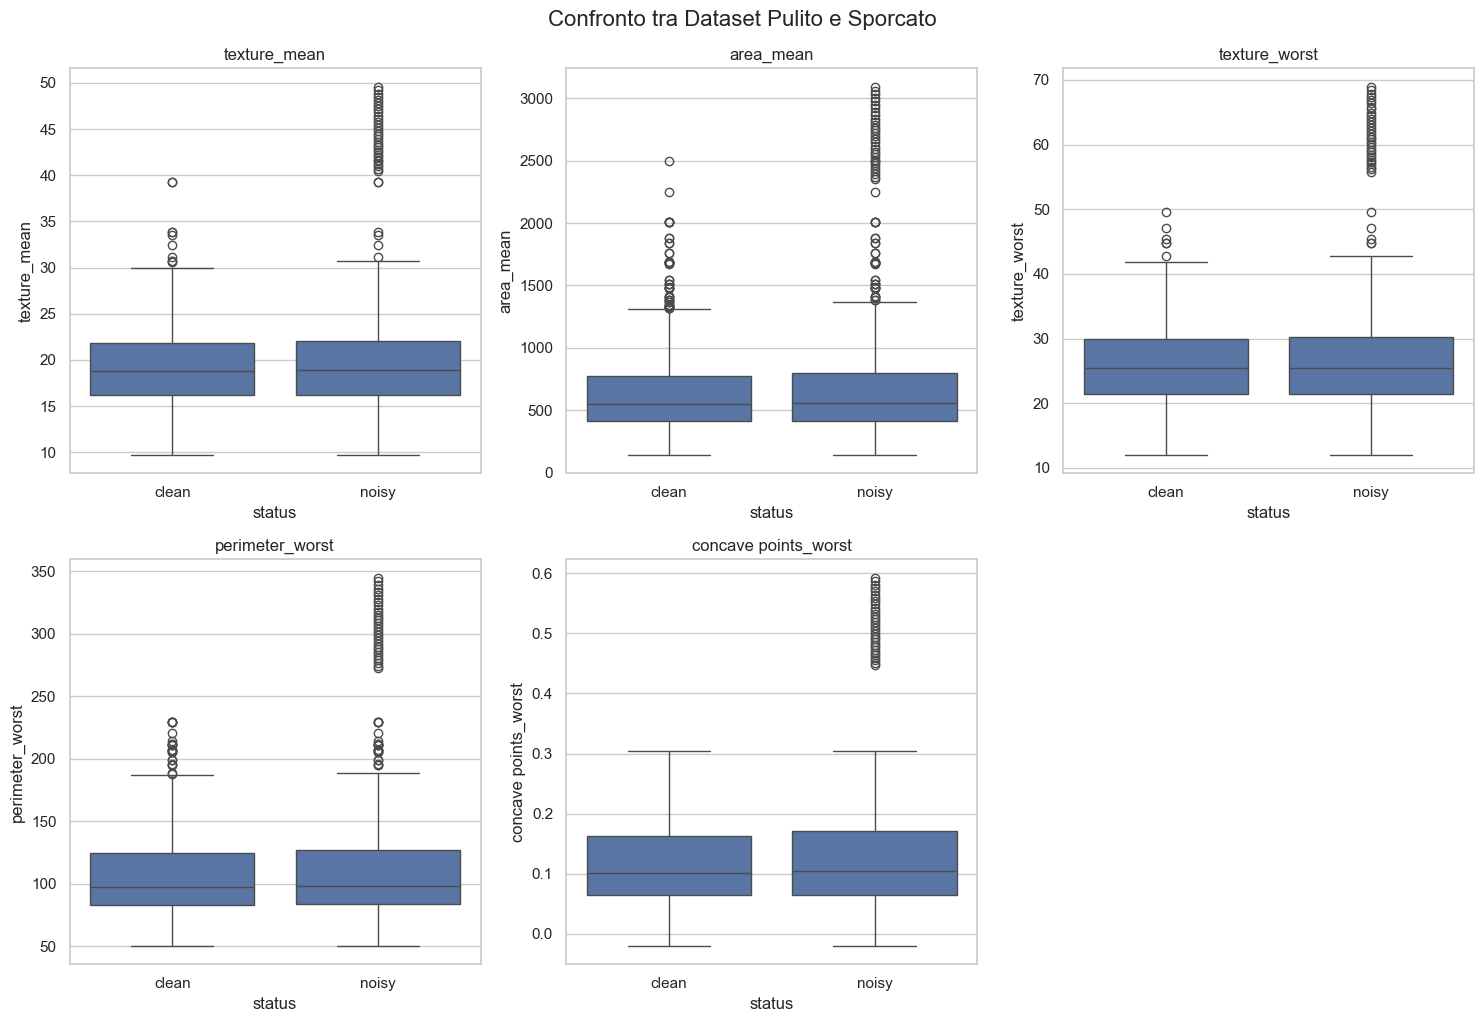

Percentuale di rumore: 0.5. Accuracy: 0.9844444444444445, AUC: 0.981367159336698
F1 Score: 0.9844304880778397, Precision: 0.9844276113309465, Recall: 0.9844444444444445



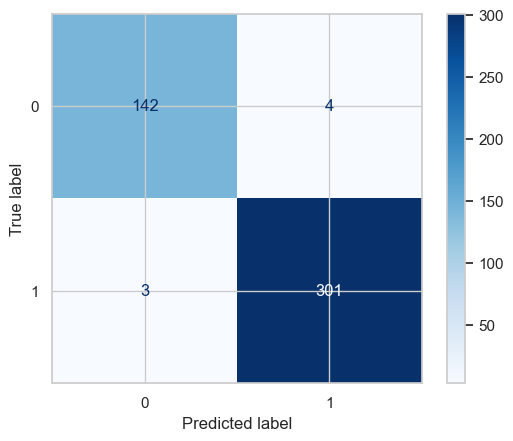

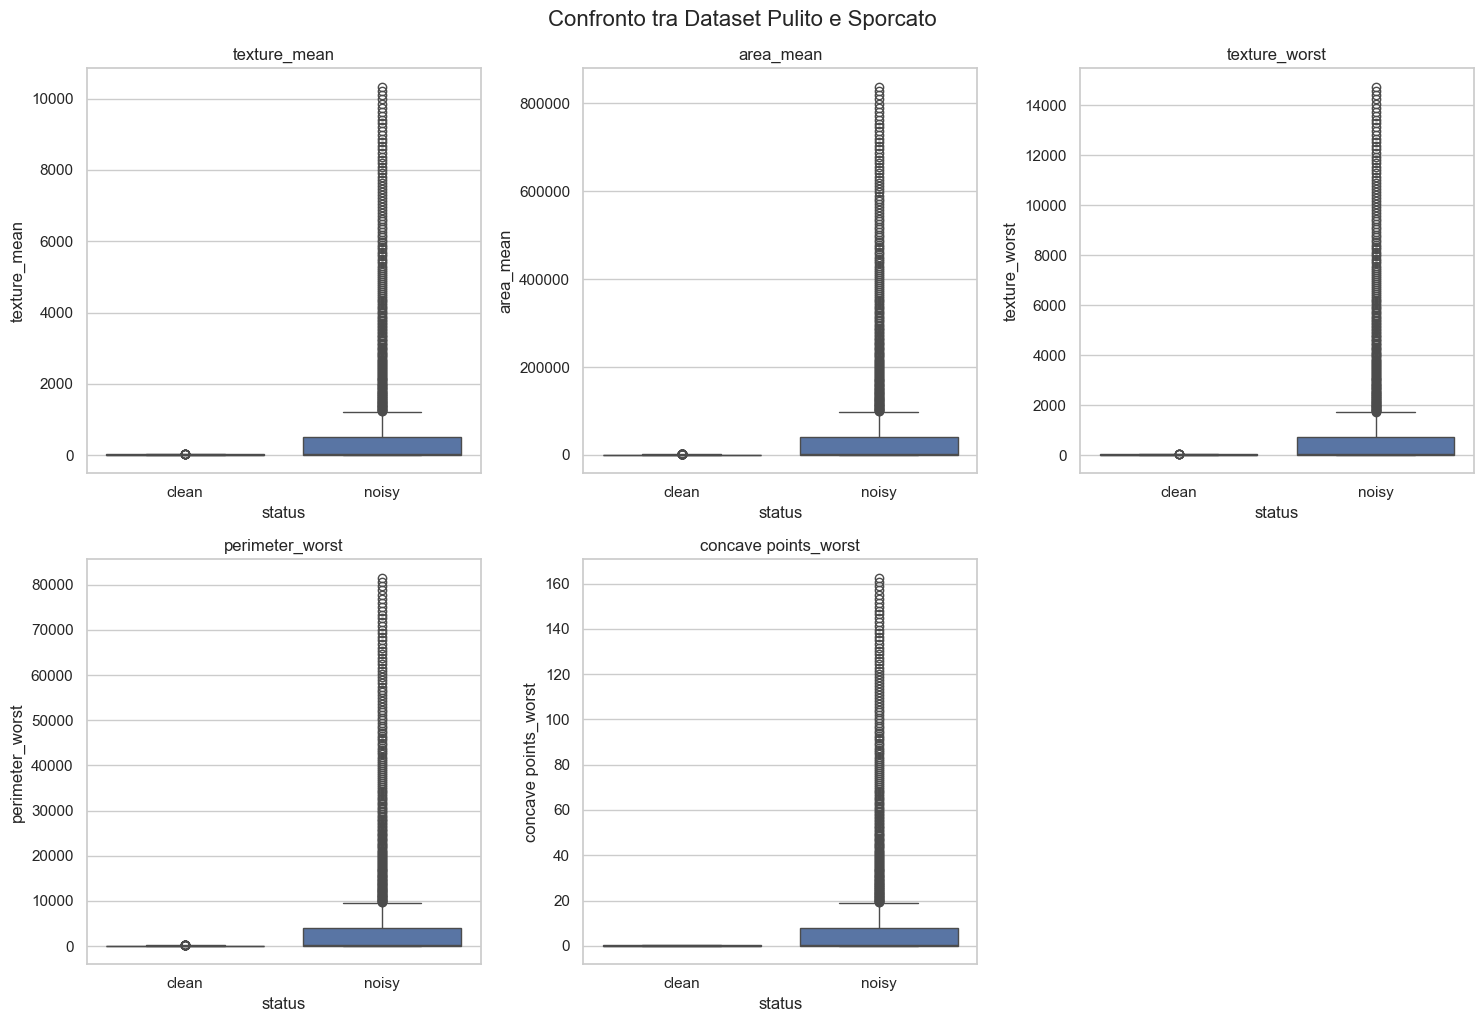

Percentuale di rumore: 1. Accuracy: 0.9733333333333334, AUC: 0.9678037130497477
F1 Score: 0.9732850951573394, Precision: 0.9732806826434277, Recall: 0.9733333333333334



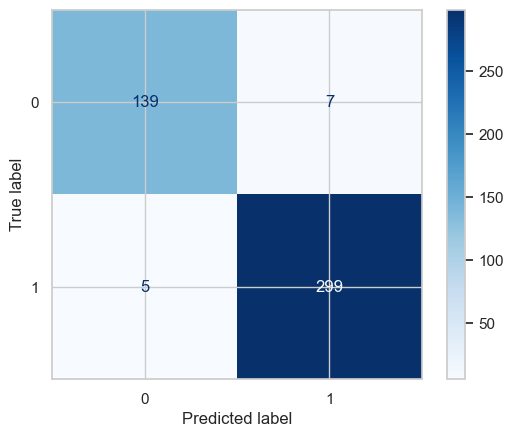

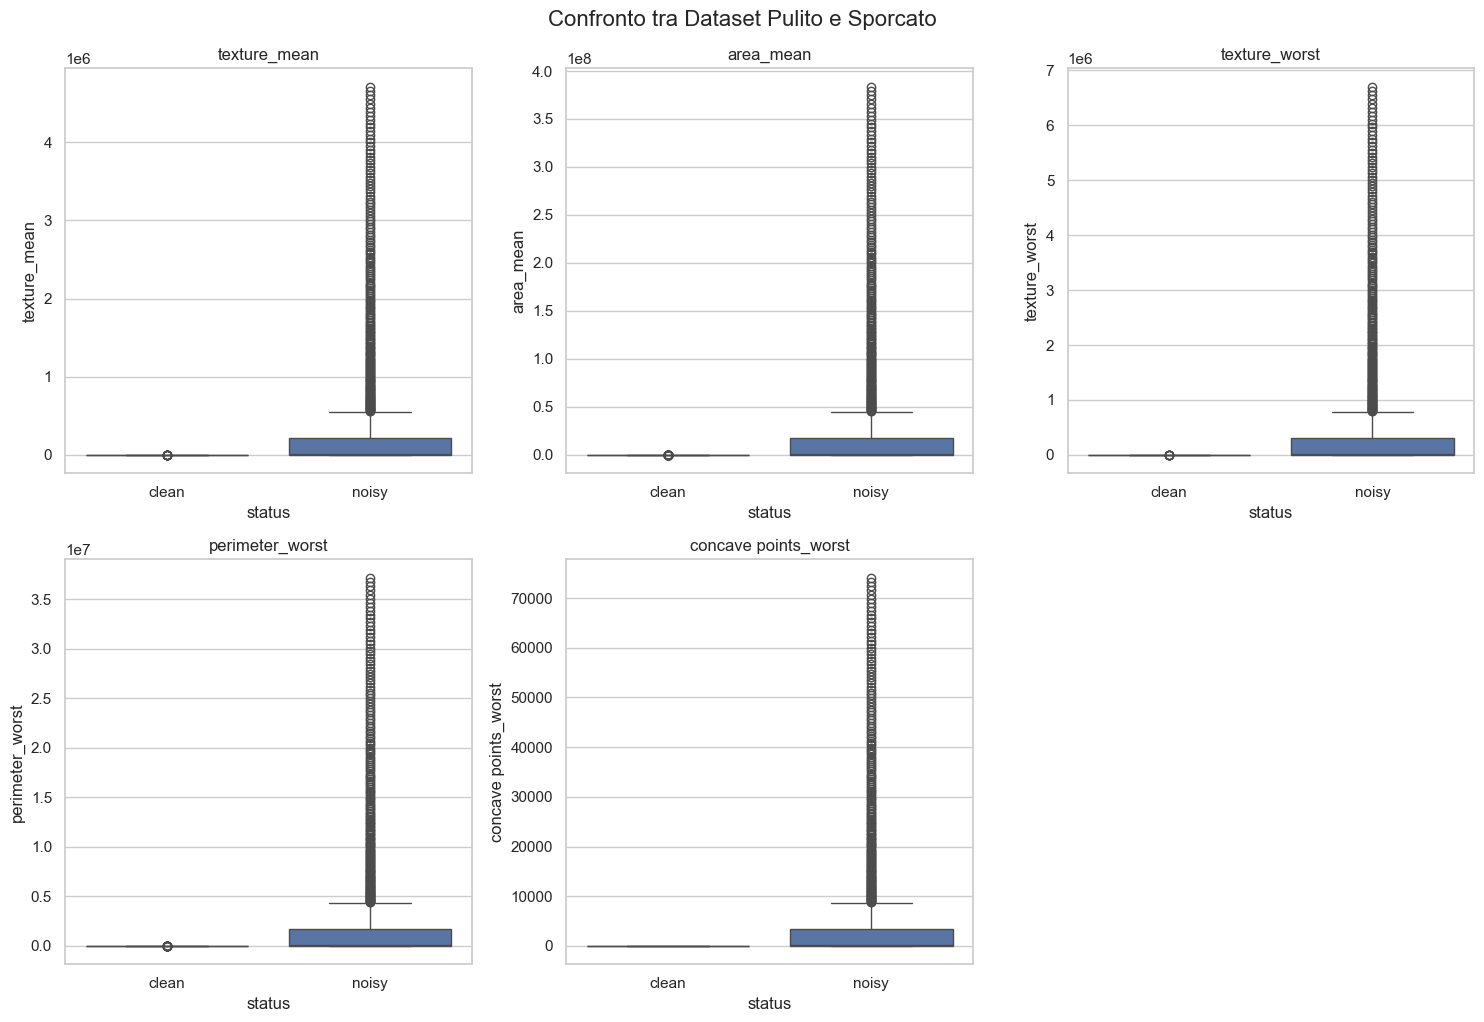

In [29]:
datasetSporcatoOutliers = {'percentuale': [], 'dataset': []}

# Aggiungi le metriche ROC al dizionario delle metriche
metricsOutliers = {
    'percentuale': [],
    'accuracy': [],
    'f1_score': [],
    'precision': [],
    'recall': [],
    'fpr': [],   # False Positive Rate
    'tpr': [],   # True Positive Rate
    'roc_auc': [] # Area Under the Curve
}

for percentuale in percentuali_rumore:
    dataset_sporcato = introduce_outliers(X_train.copy(), topFeaturesByImportance, percentuale)  # Funzione che introduce rumore nel dataset

    datasetSporcatoOutliers['dataset'].append(dataset_sporcato)
    datasetSporcatoOutliers['percentuale'].append(percentuale*100)

    # Creiamo e addestriamo il modello di Decision Tree con il dataset sporco
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(dataset_sporcato, y_train)

    # Effettua le previsioni sui dati di test
    y_pred_prob = clf.predict_proba(X_test)  # Probabilità predette
    y_pred = clf.predict(X_test)

    # Calcola le metriche di performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcola le curve ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])  # Assumendo binario e la classe positiva è la seconda
    roc_auc = auc(fpr, tpr)

    # Salva le metriche
    metricsOutliers['percentuale'].append(percentuale)
    metricsOutliers['accuracy'].append(accuracy)
    metricsOutliers['f1_score'].append(f1)
    metricsOutliers['precision'].append(precision)
    metricsOutliers['recall'].append(recall)
    metricsOutliers['fpr'].append(fpr)
    metricsOutliers['tpr'].append(tpr)
    metricsOutliers['roc_auc'].append(roc_auc)

    print(f'Percentuale di rumore: {percentuale}. Accuracy: {accuracy}, AUC: {roc_auc}\n'
          f'F1 Score: {f1}, Precision: {precision}, Recall: {recall}\n')
    plot_confusion_matrix(clf)    

    # Chiamata alla funzione di plot per confrontare le distribuzioni delle feature
    plot_feature_distribution_comparison(X_train, dataset_sporcato, X.columns, topFeaturesByImportance)

### 5.3 Esecuzione Decision Tree con aggiunta di righe duplicate
Infine, viene analizzato il caso in cui vengono generate nuove righe, che sono
dei duplicati di istanze già esistenti nel dataset.

Percentuale di rumore: 0.01. Accuracy: 0.9622222222222222, AUC: 0.9560201874549388
F1 Score: 0.9621883281890392, Precision: 0.9621651906287294, Recall: 0.9622222222222222



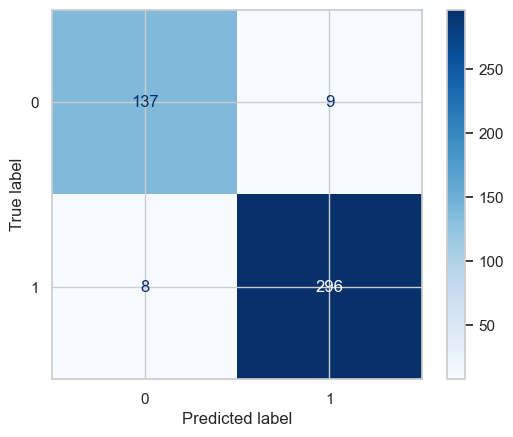

Percentuale di rumore: 0.02. Accuracy: 0.9777777777777777, AUC: 0.9728731074260996
F1 Score: 0.9777375792977827, Precision: 0.9777414669571531, Recall: 0.9777777777777777



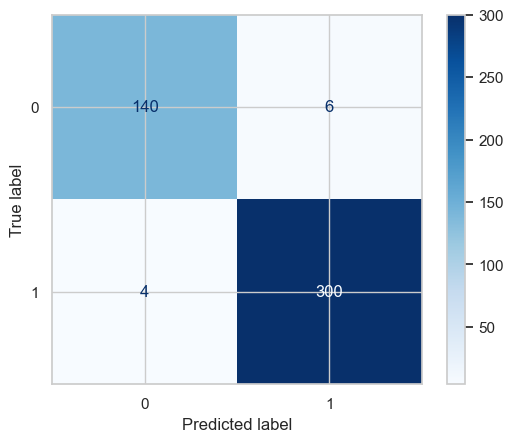

Percentuale di rumore: 0.03. Accuracy: 0.9666666666666667, AUC: 0.962869502523432
F1 Score: 0.9666960920470881, Precision: 0.966736265463281, Recall: 0.9666666666666667



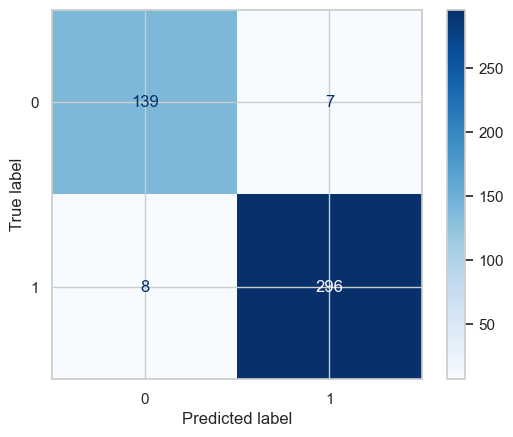

Percentuale di rumore: 0.5. Accuracy: 0.9666666666666667, AUC: 0.9682092645998558
F1 Score: 0.9668627352776958, Precision: 0.9675755375101781, Recall: 0.9666666666666667



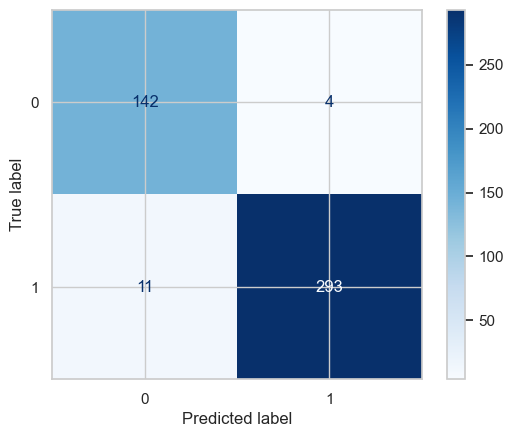

Percentuale di rumore: 1. Accuracy: 0.9622222222222222, AUC: 0.9560201874549388
F1 Score: 0.9621883281890392, Precision: 0.9621651906287294, Recall: 0.9622222222222222



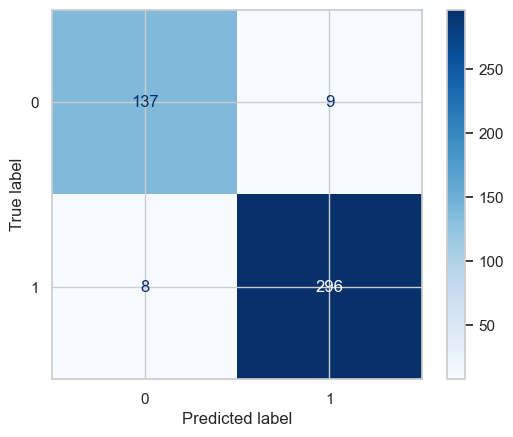

In [30]:
datasetSporcatoDuplicate = {'percentuale': [], 'dataset': []}

metricsDuplicate = {
    'percentuale': [],
    'accuracy': [],
    'f1_score': [],
    'precision': [],
    'recall': [],
    'fpr': [],   # False Positive Rate
    'tpr': [],   # True Positive Rate
    'roc_auc': [] # Area Under the Curve
}

for percentuale in percentuali_rumore:
    dataset_sporcato, y_train_sporcata = introduce_duplicate_rows(X_train.copy(), percentuale, y_train.copy())  # Funzione che introduce rumore nel dataset

    datasetSporcatoDuplicate['dataset'].append(dataset_sporcato)
    datasetSporcatoDuplicate['percentuale'].append(percentuale*100)

    # Creiamo e addestriamo il modello di Decision Tree con il dataset sporco
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(dataset_sporcato, y_train_sporcata)

    # Effettua le previsioni sui dati di test
    y_pred_prob = clf.predict_proba(X_test)  # Probabilità predette
    y_pred = clf.predict(X_test)

    # Calcola le metriche di performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcola le curve ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])  # Assumendo binario e la classe positiva è la seconda
    roc_auc = auc(fpr, tpr)

    # Salva le metriche
    metricsDuplicate['percentuale'].append(percentuale)
    metricsDuplicate['accuracy'].append(accuracy)
    metricsDuplicate['f1_score'].append(f1)
    metricsDuplicate['precision'].append(precision)
    metricsDuplicate['recall'].append(recall)
    metricsDuplicate['fpr'].append(fpr)
    metricsDuplicate['tpr'].append(tpr)
    metricsDuplicate['roc_auc'].append(roc_auc)

    print(f'Percentuale di rumore: {percentuale}. Accuracy: {accuracy}, AUC: {roc_auc}\n'
          f'F1 Score: {f1}, Precision: {precision}, Recall: {recall}\n')

    # Chiamata alla funzione di plot per confrontare le distribuzioni delle feature
    plot_confusion_matrix(clf)
    

## 6. Analisi dell'impatto del rumore su feature specifiche del dataset
In questa sezione andremo ad analizzare quanto impatta sul dataset la presenza di rumore su una feature. In particolare lo andremo a studiare singolarmente su quelle più importanti (prima l'aggiunta del rumore avvenita su tutte le top 5 feature, mentre adesso andiamo ad aggiungerlo a feature specifiche)

### 6.1 Definizione delle funzioni per l'aggiunta di rumore in una feature specifica
Vengono utilizzate le stesse funzioni create precedentemente per l'aggiunta di rumore


In [31]:
def addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, typeOfNoise):
    num_percentuali = len(percentuali_rumore)

    # Configura la grandezza della figura in base al numero di percentuali
    if num_percentuali == 1:
        fig_width, fig_height = 12, 8  # Dimensioni più grandi per un singolo grafico
        font_size = 14
        rows = 1
        cols = 1
    else:
        cols = 3  # Numero di colonne nel layout
        rows = (num_percentuali + cols - 1) // cols  # Calcola il numero di righe necessarie
        fig_width, fig_height = cols * 5, rows * 4
        font_size = 10

    plt.figure(figsize=(fig_width, fig_height))  # Dimensione della figura

    for i, percentuale in enumerate(percentuali_rumore):
        # Introduci i dati mancanti
        
        
        if typeOfNoise == 'missing':
            dataset_sporcato = introduce_missing_data_custom(X_train.copy(), FEATURE_TO_EVALUATE, percentuale)
        else:
            dataset_sporcato = introduce_outliers(X_train.copy(), FEATURE_TO_EVALUATE, percentuale)
            
        # Allena il modello
        model = DecisionTreeClassifier(random_state=42)
        model.fit(dataset_sporcato, y_train)

        # Calcola l'accuratezza sui dati di test
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Ottieni l'importanza delle caratteristiche
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Evidenzia le caratteristiche sporcate
        feature_importance_df['Highlight'] = feature_importance_df['Feature'].isin(FEATURE_TO_EVALUATE)

        # Crea una sottotrama per ogni percentuale
        plt.subplot(rows, cols, i + 1)

        # Usa `hue` per colorare le barre e rimuovi la legenda automatica
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Highlight', palette={False: '#1f77b4', True: '#ffeb3b'}, dodge=False, legend=False)

        # Aggiungi l'accuratezza al titolo del grafico
        plt.title(f'Percentuale: {percentuale*100:.2f}%\n'
                  f'Accuratezza: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%\n'
                  f'Recall: {recall*100:.2f}%, F1_Score: {f1*100:.2f}% ', fontsize=font_size)
        plt.xlabel('Importanza', fontsize=font_size)
        plt.ylabel('Caratteristica', fontsize=font_size)
        plt.xticks(fontsize=font_size)
        plt.yticks(fontsize=font_size)

    plt.tight_layout()  # Ottimizza il layout
    plt.show()

### 6.2 Base per il nostro test
In questa sezione viene mostrata la base per il nostro test, eseguendo l'algoritmo sul dataset senza rumore, per vedere quali feature vengono considerate più importanti.

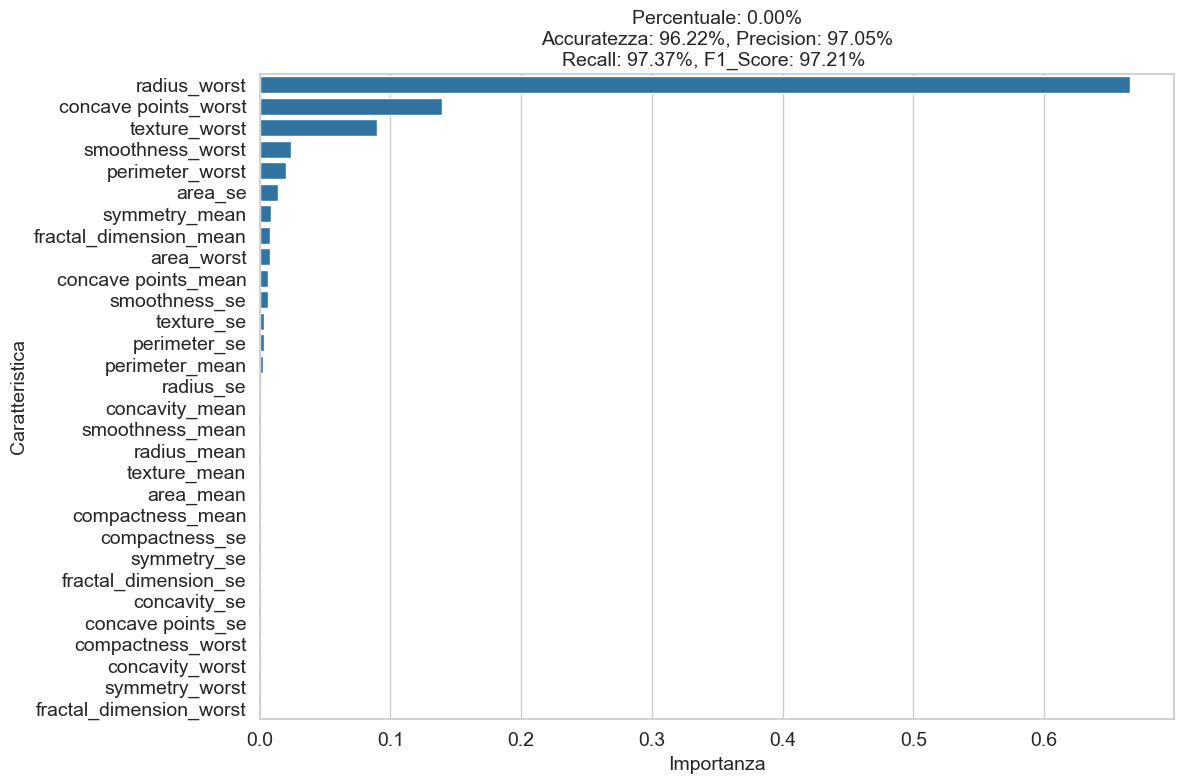

In [32]:
FEATURE_TO_EVALUATE = [] # Lista vuota per non aggiungere rumore
percentuali_rumore = [0] # 0% per non aggiungere rumore

addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'missing')

### 6.3 Analisi del modello con le feature sporcate di valori NULLI

#### 6.3.2 Aggiunta di rumore alla feature "radius_worst"
Possiamo notare dal grafico precedente che la feature "radius_worst" è la più importante. In questa sezione andiamo ad aggiungere rumore solo a questa feature per vedere come cambia l'importanza delle feature.

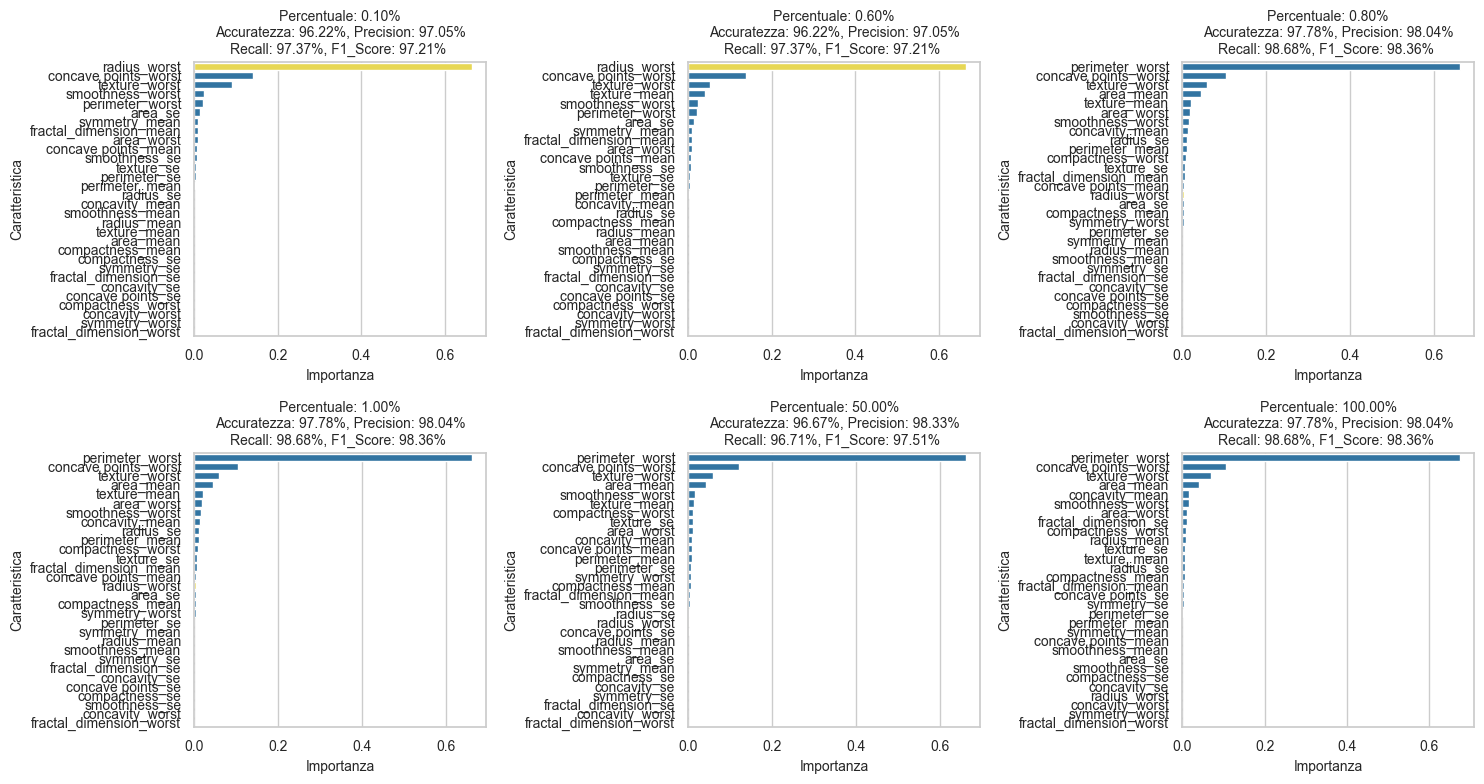

In [33]:
FEATURE_TO_EVALUATE = ['radius_worst']
percentuali_rumore = [0.001, 0.006, 0.008, 0.01, 0.5, 1] 

addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'missing')

Le percentuali di rumore inserite sono: 0.1%, 0.6%, 0.8%, 1%, 50%, 100%, possiamo notare che, man mano che aumenta il rumore, la feature "radius_worst"
mantiene una certa rilevanza in termini di importanza nelle prime percentuali
22
di rumore (0.1%, 0.6%, 0.8%), evidenziando la sua robustezza e contributo
significativo alla classificazione. Tuttavia, a partire dall’1% di rumore, la sua
importanza inizia a diminuire drasticamente, mentre altre feature come perimeter_worst e concave_points_worst guadagnano centralità.


Al 100% di rumore, "radius_worst" sembra avere un peso minore, indicando
che con rumore elevato, il modello dipende meno da questa feature, nonostante il mantenimento di buone metriche di performance come accuratezza,
precisione e recall. Questo suggerisce che il rumore riduce la capacità del
modello di sfruttare appieno questa variabile inizialmente rilevante.


#### 6.3.3 Aggiunta di rumore alla feature "perimeter_worst" e "radius_worst"

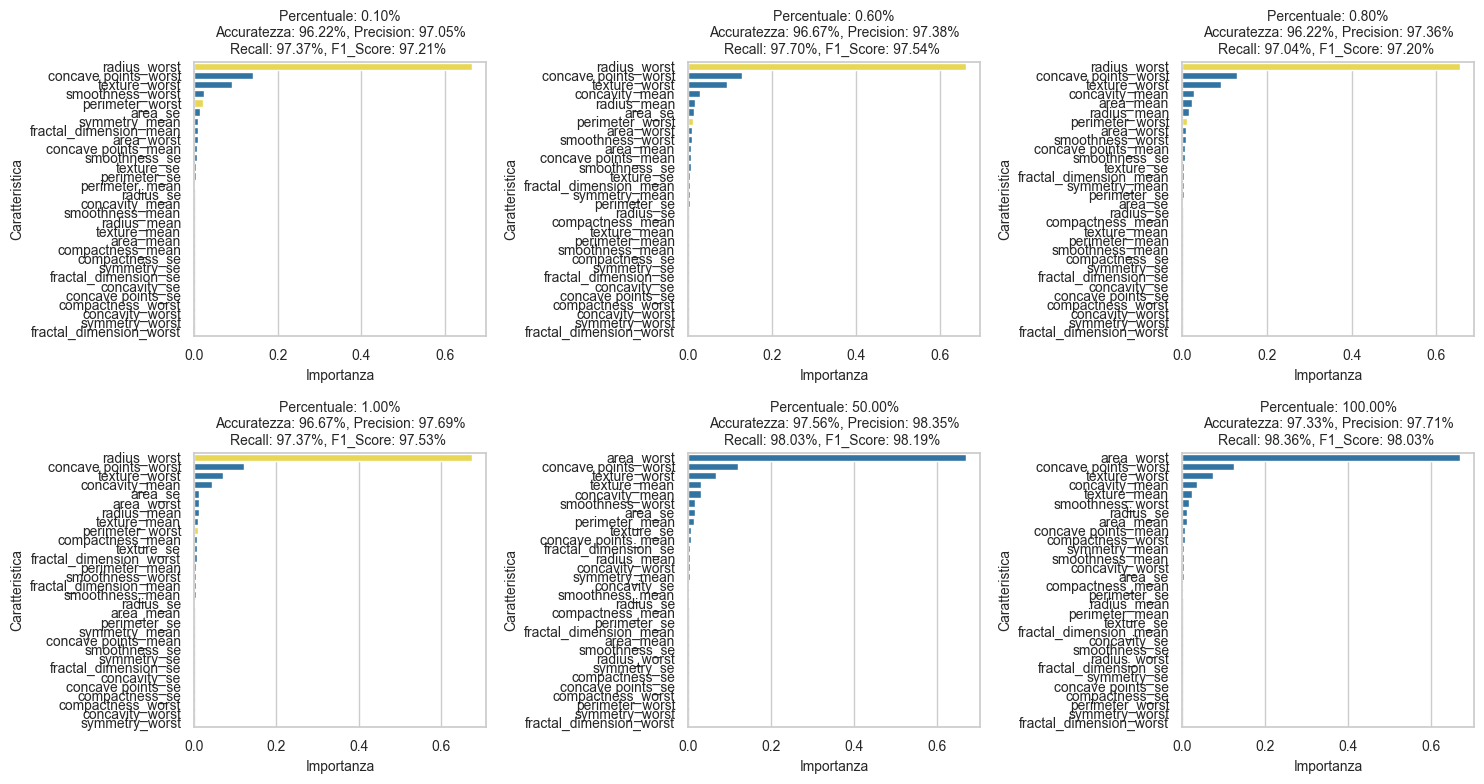

In [34]:
FEATURE_TO_EVALUATE = ['radius_worst', 'perimeter_worst']
percentuali_rumore = [0.001, 0.006, 0.008, 0.01, 0.5, 1]

addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'missing')

Dai grafici si evince un comportamento simile a quello precedentemente studiato, ma con la differenza che a 100% di rumore su entrambe le feature
l’algoritmo inizia a calare di poco l’accuratezza. Questo permette di poter
concludere nonostante l’algoritmo riesce a gestire un rumore elevato su due
feature a lungo andare più feature sporchiamo e più il modello degrada.


Di seguito lo studio sull’andamento nel caso di rumore su più feature del
dataset.


#### 6.3.4 Aggiunta di rumore su un numero elavato di feature

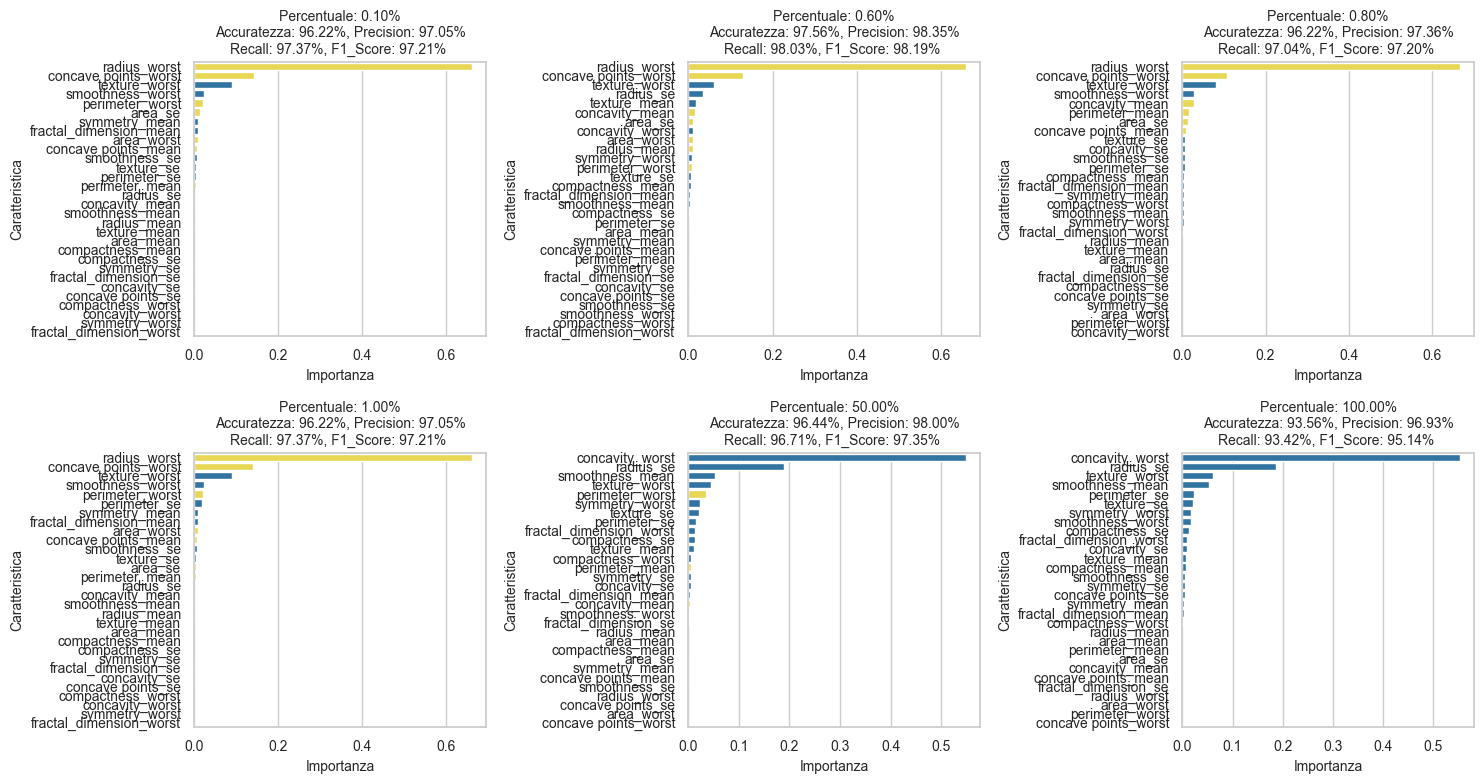

In [35]:
FEATURE_TO_EVALUATE = ['radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'concave points_mean', 'concavity_mean', 'area_mean', 'perimeter_mean', 'radius_mean', 'area_se']
percentuali_rumore = [0.001, 0.006, 0.008, 0.01, 0.5, 1]

addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'missing')

Si osserva che nonostante il decision tree sia un algoritmo molto robusto e
consolidato per la classificazione con il numero di feature che sono state sporcate (pari a 10) l’accuratezza del modello è calata in modo significativo per
una qualsiasi percentuale di rumore al di sopra dell’1%, cosa prevedibile,
ma ci fa capire l’importanza di un dataset pulito per l’addestramento di un
modello.

#### 6.3.5 Aggiunta di rumore su tutte le feature

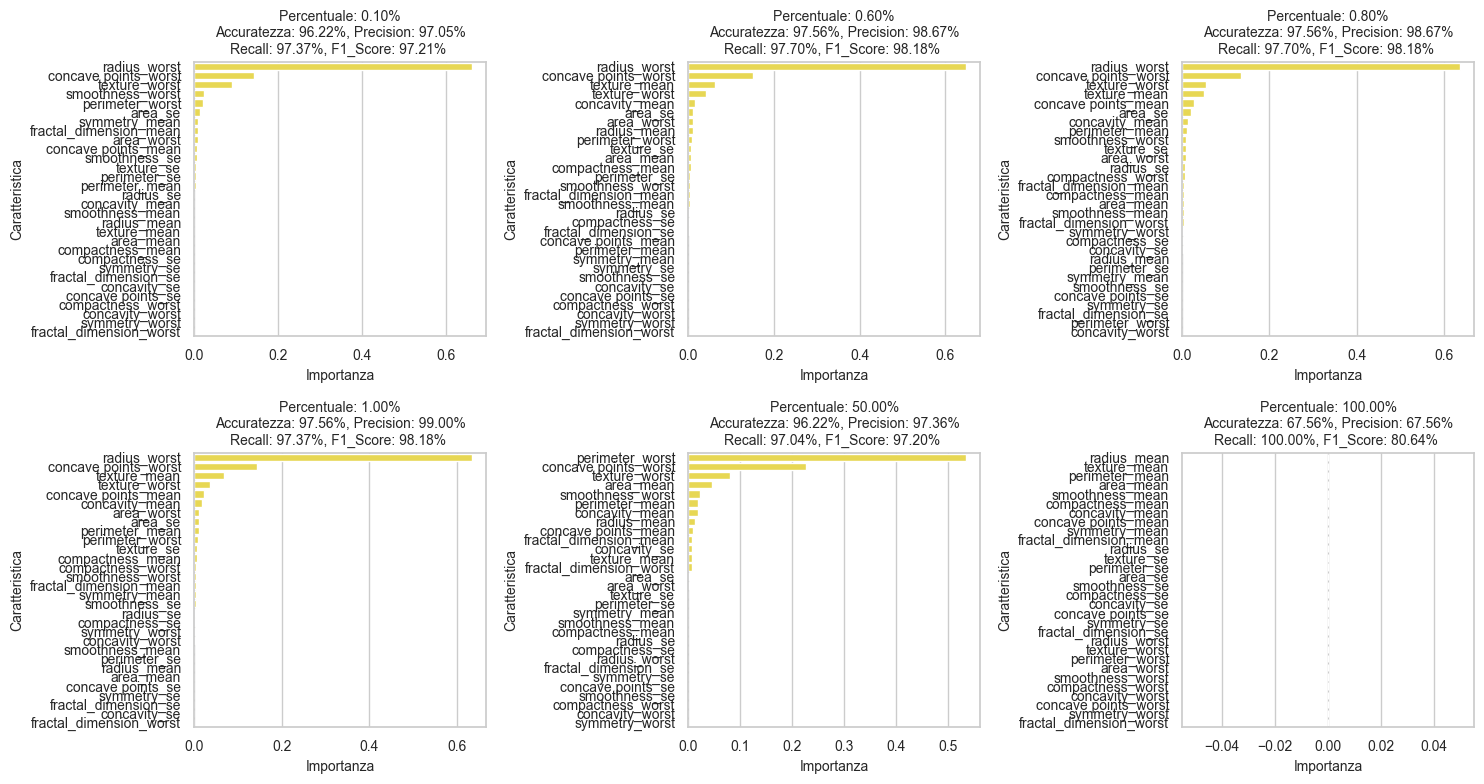

In [36]:
FEATURE_TO_EVALUATE = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
    'radius_se',
    'texture_se',
    'perimeter_se',
    'area_se',
    'smoothness_se',
    'compactness_se',
    'concavity_se',
    'concave points_se',
    'symmetry_se',
    'fractal_dimension_se',
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_worst',
    'concavity_worst',
    'concave points_worst',
    'symmetry_worst',
    'fractal_dimension_worst'
]

percentuali_rumore = [0.001, 0.006, 0.008, 0.01, 0.5, 1]

addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'missing')

Le percentuali utilizzate sono uguali a quelle utilizzate precedentemente per
calcolare gli altri grafici. Possiamo notare che l’accuratezza del modello fino al
50% è sorprendentemente robusta, mentre come ci si poteva aspettare al 100%
il modello ha un calo totale delle prestazioni e diventa inaffidabile. Notiamo,
inoltre, come al 100% il modello abbia (giustamente) smesso di considerare
importanti le feature o comunque di avere una preferenza.


In conclusione questo ci fa capire oltre all’importanza di un dataset pulito, specialmente se consideriamo l’ambito del dataset scelto da noi, ovvero,
l’ambito medico, ma anche quanto è robusto l’algoritmo Decision Tree Classifier che nonostante il 50% delle feature siano valori nulli (che ricordiamo
esser inseriti casualmente all’interno del dataset) riesce comunque a predirre
correttamente la maggior parte dei record.

### 6.4 Analisi del modello con le feature sporcate di OUTLIERS

In questa sezione si analizzeranno le prestazioni del modello in seguito all’alterazione delle feature più importanti, che verranno rese outliers seguendo le
percentuali pre-indicate.


#### 6.4.1 Aggiunta di rumore alla feature "radius_worst"


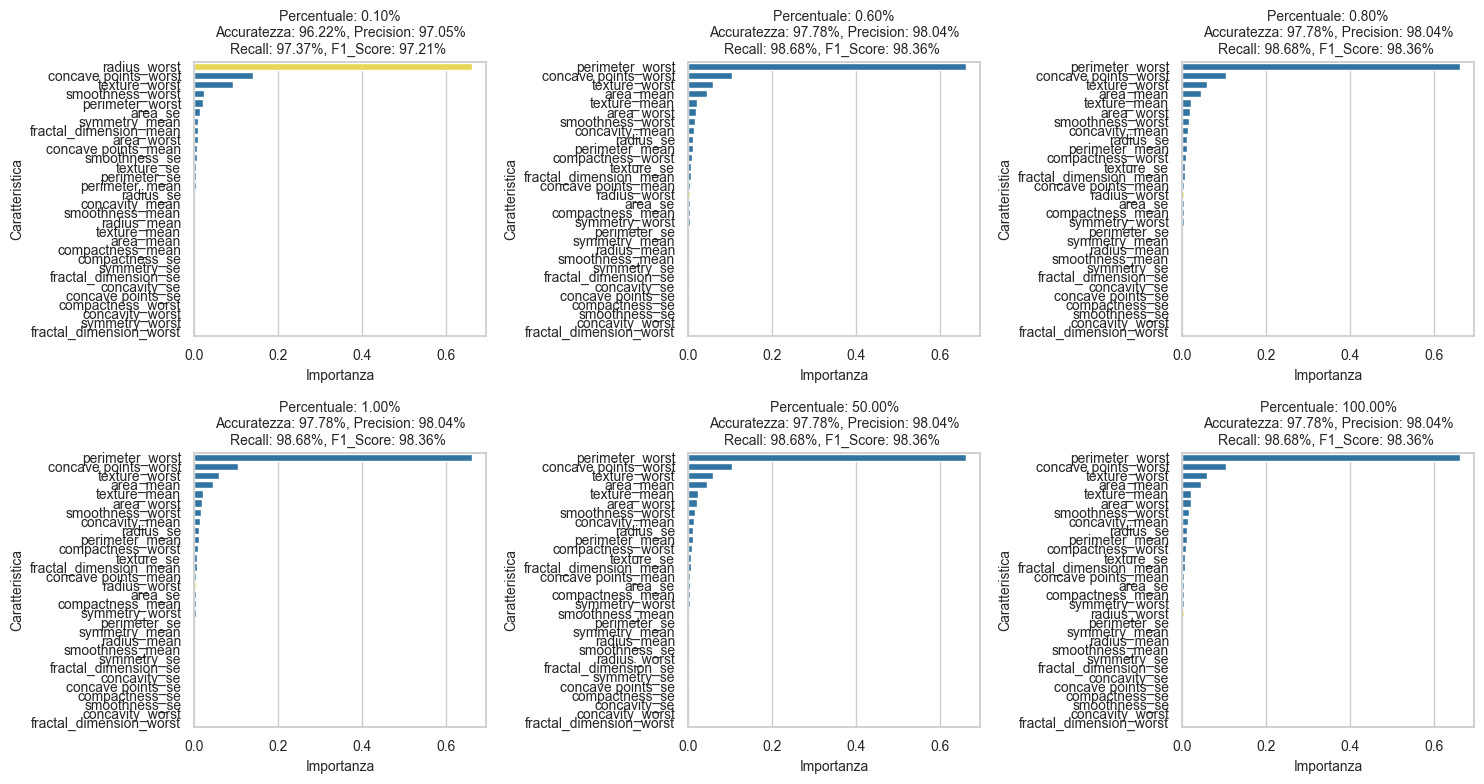

In [37]:
FEATURE_TO_EVALUATE = ['radius_worst']
percentuali_rumore = [0.001, 0.006, 0.008, 0.01, 0.5, 1]

addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'outlier')

Possiamo notare che rispetto alla base i valori nelle prime percentuali (0.1%
e 0.6%) rimangono quasi invariati, già dallo 0.8% però i valori aumentano in
quanto il modello non ritiene radius_worst importante come lo era nelle percentuali prima. A 100%, invece, come ci si potrebbe aspettare l’accuratezza
e le altre metriche calano un pochino, sicuramente dovuto al fatto che tutti i
valori delle feature che siamo andati a considerare sono adesso outliers

#### 6.4.2 Aggiunta di rumore alla feature "perimeter_worst" e "radius_worst"
Andiamo adesso ad aggiungere rumore anche a perimeter_worst per vedere
come si comporta il modello avendo le prime due percentuali che ritiene più
importanti sporcate prima con percentuali piccole e poi con grosse percentuali
di rumore.

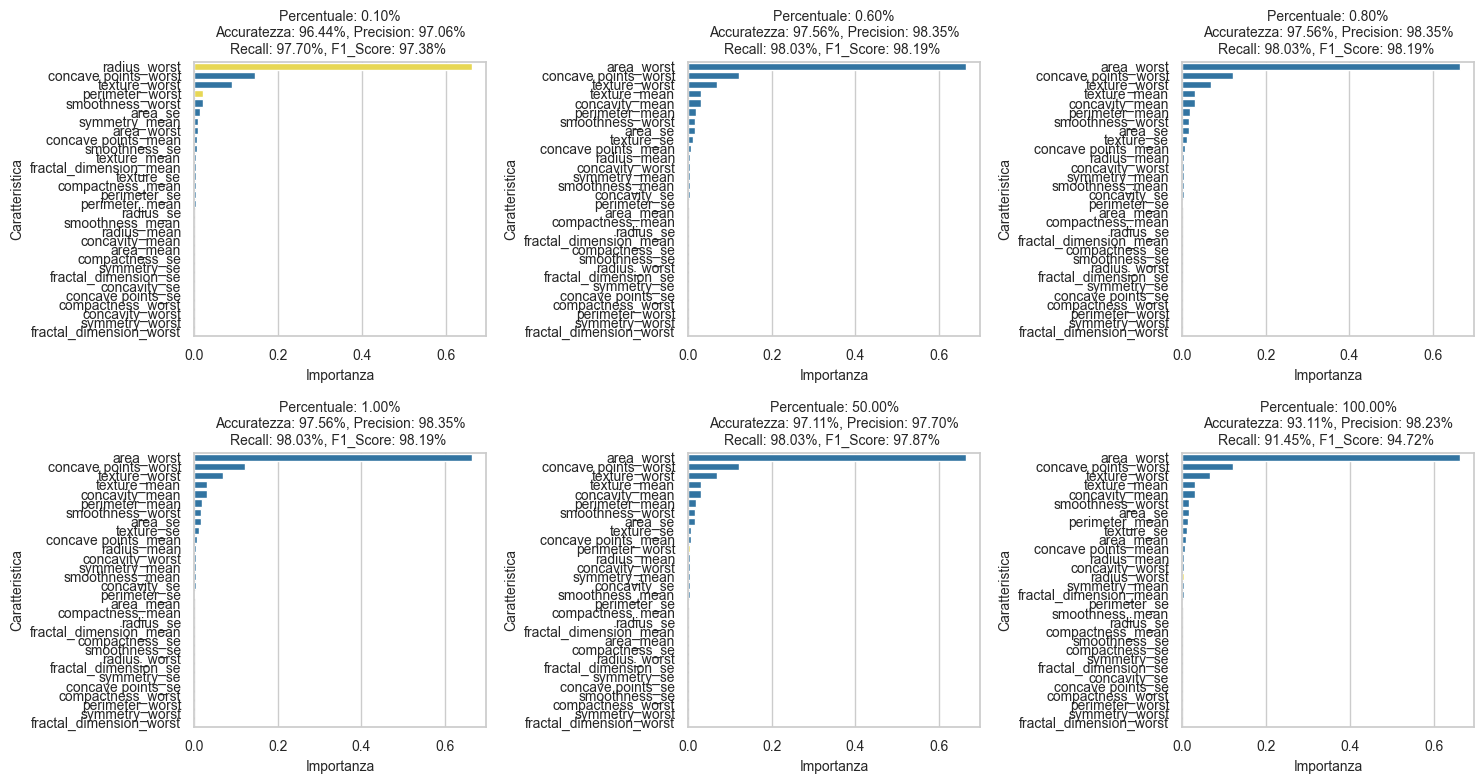

In [38]:
FEATURE_TO_EVALUATE = ['radius_worst', 'perimeter_worst']
percentuali_rumore = [0.001, 0.006, 0.008, 0.01, 0.5, 1]
addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'outlier')

Con due feature sporcate il modello non si comporta come ci saremmo aspettati, infatti, subito un calo minimo, praticamente trascurabile all’1% di rumore,
ma dopodichè si riprendere a persino al 100% l’accuratezza rimane alta.

#### 6.4.3 Aggiunta di rumore alle prime 10 feature più importanti
Abbiamo adesso sporcato un totale di dieci feature e siamo arrivati ad una
situazione dove nonostante avesse dieci feature sporcate il modello per percentuali piccole continua a comportarsi egregiamente, solo dal 50% in poi il
modello subisce un calo nelle prestazioni


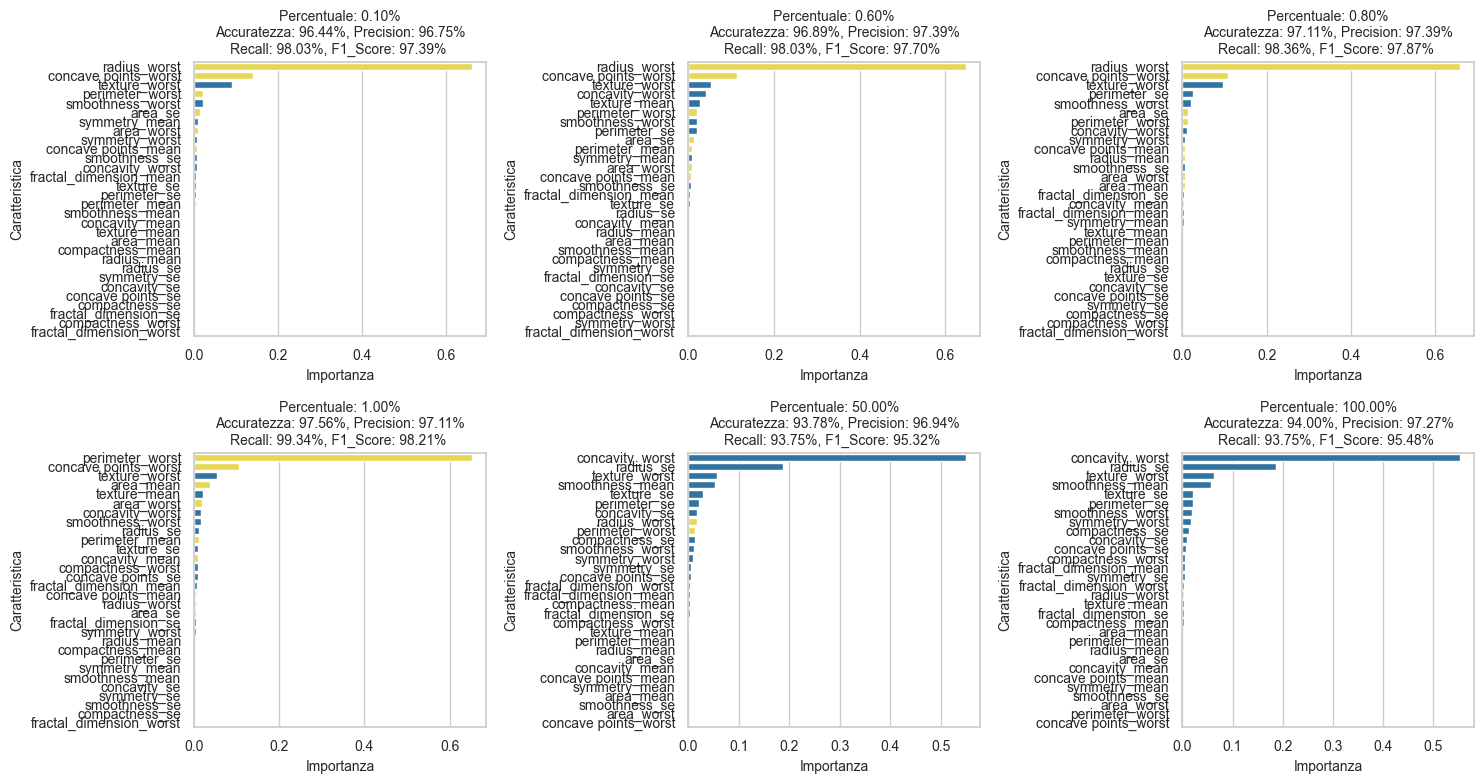

In [39]:
FEATURE_TO_EVALUATE = ['radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'concave points_mean', 'concavity_mean', 'area_mean', 'perimeter_mean', 'radius_mean', 'area_se']
percentuali_rumore = [0.001, 0.006, 0.008, 0.01, 0.5, 1]

addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'outlier')

#### 6.4.4 Aggiunta di rumore su tutte le feature

In quest’ultima sezione del rumore outliers andiamo adesso, come esperimento, ad aggiungere del rumore progressivo a tutte le feature del dataset per
vedere come si comporta il modello.

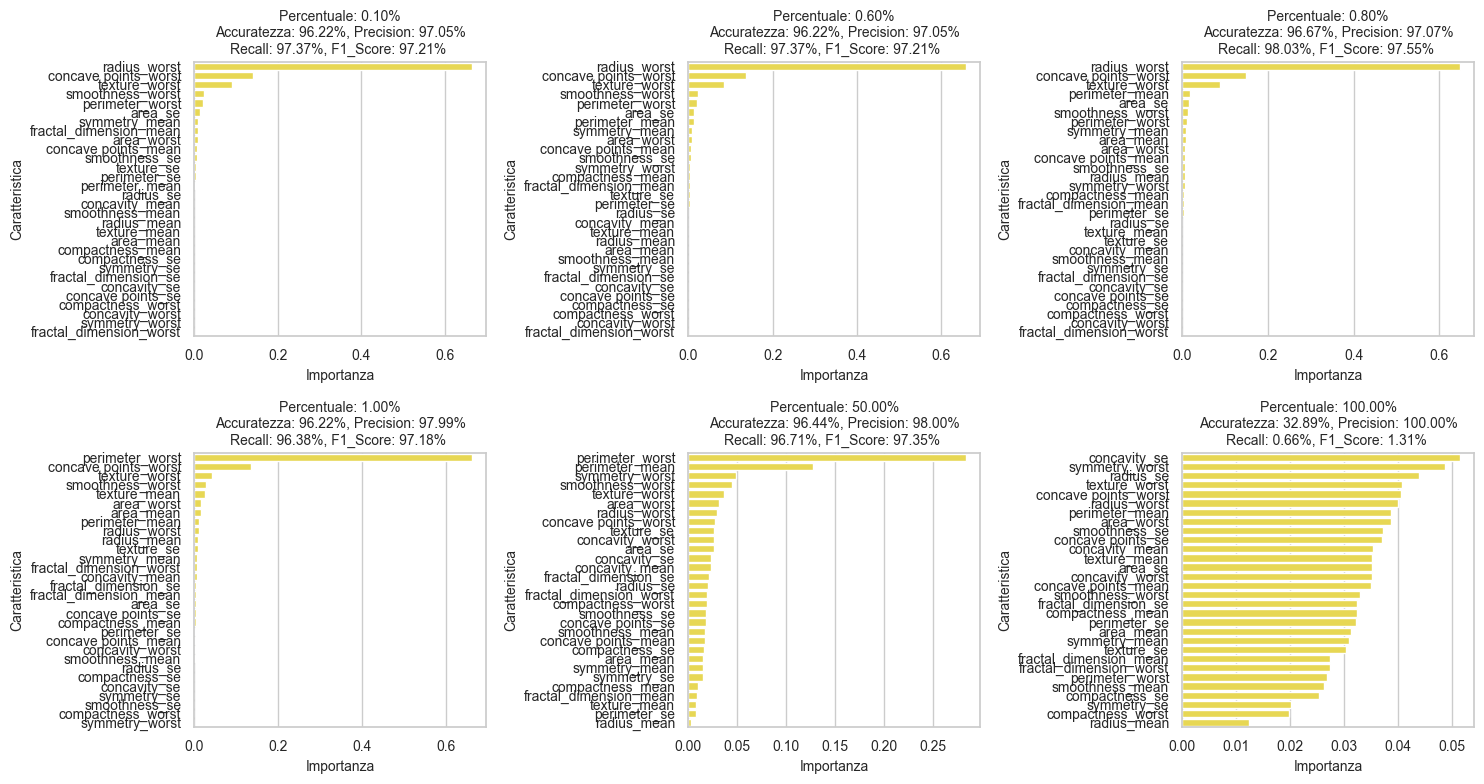

In [40]:
FEATURE_TO_EVALUATE = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
    'radius_se',
    'texture_se',
    'perimeter_se',
    'area_se',
    'smoothness_se',
    'compactness_se',
    'concavity_se',
    'concave points_se',
    'symmetry_se',
    'fractal_dimension_se',
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_worst',
    'concavity_worst',
    'concave points_worst',
    'symmetry_worst',
    'fractal_dimension_worst'
]

percentuali_rumore = [0.001, 0.006, 0.008, 0.01, 0.5, 1]

addestro_e_genero_plot(FEATURE_TO_EVALUATE, percentuali_rumore, 'outlier')

Questa situazione ci risulta più interessante rispetto alle altre in quanto possiamo andare a vedere come il modello gestisce le feature all’aumentare del
rumore nell’intero dataset. Il modello per percentuali basse possiamo notare che riesce comunque ad avere un accuratezza straordinaria considerando
che sappiamo con certezza che ci sono feature sporcate con outliers, già oltre
all’1% però le cose si fanno interessanti, possiamo notare che il modello al
50% inizia già a cambiare la classifica delle feature che ritiene più importanti,
cala la precisione, come anche le altre metriche, ma rimangono comunque al
di sopra del 90%, che, sapendo che il dataset su cui sta venendo addestrato
presenta per il 50% valori di outliers è sbalorditivo. Al 100% però, come ci
si potrebbe aspettare il modello non sa più cosa considerare e cosa fare... le
metriche di importanza delle feature sono tutte sballate e il modello è completamente incapace di predirre qualsiasi cosa, infatti possiamo notare che tutte
le metriche tranne l’accuratezza sono a 0%.
L’accuratezza ovviamente non potrà mai scendere allo zero percento in quanto
il modello comunque cerca di predirre qualcosa giocando un gioco di probabilità, dove ha il 50% di chance di sbagliare e il 50% di predirre correttamente,
infatti a queste percentuali di rumore non è più una predizione, ma solo un
gioco di probabilità e casualità.

#################################################################################################################

## 7. Conclusione e grafici riassuntivi

### 7.1 Grafico Decision Tree con valori nulli

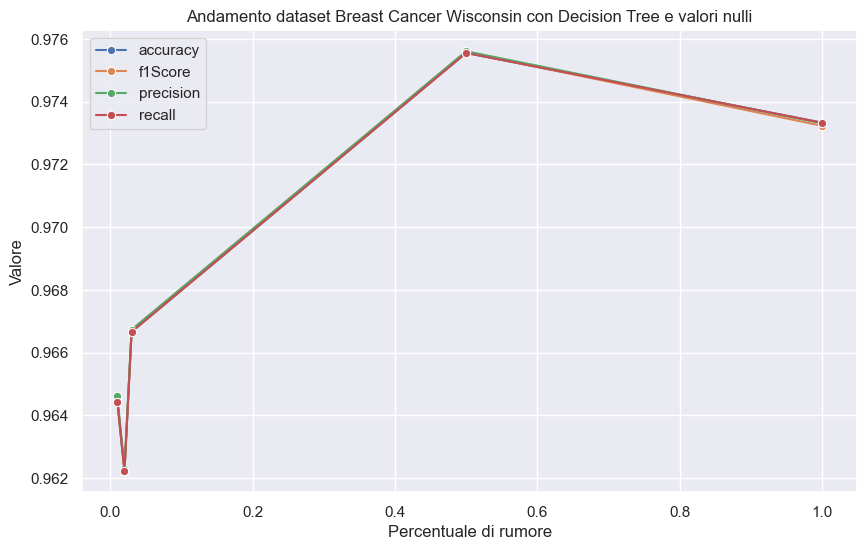

In [41]:
# Converti il dizionario in DataFrame
metrics_df = pd.DataFrame(metricsNUll)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.lineplot(data=metrics_df, x='percentuale', y='accuracy', label='accuracy', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='f1_score', label='f1Score', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='precision', label='precision', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='recall', label='recall', marker='o')

plt.title('Andamento dataset Breast Cancer Wisconsin con Decision Tree e valori nulli')
plt.xlabel('Percentuale di rumore')
plt.ylabel('Valore')
plt.legend()
plt.show()

### 7.2 Grafico Decision Tree con outliers

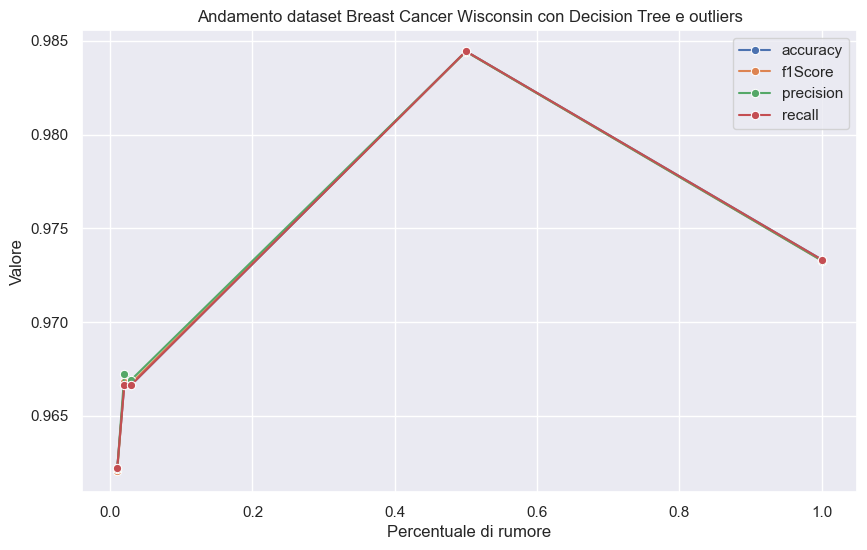

In [42]:
# Converti il dizionario in DataFrame
metrics_df = pd.DataFrame(metricsOutliers)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.lineplot(data=metrics_df, x='percentuale', y='accuracy', label='accuracy', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='f1_score', label='f1Score', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='precision', label='precision', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='recall', label='recall', marker='o')

plt.title('Andamento dataset Breast Cancer Wisconsin con Decision Tree e outliers')
plt.xlabel('Percentuale di rumore')
plt.ylabel('Valore')
plt.legend()
plt.show()

### 7.3 Grafico Decision Tree con righe duplicate

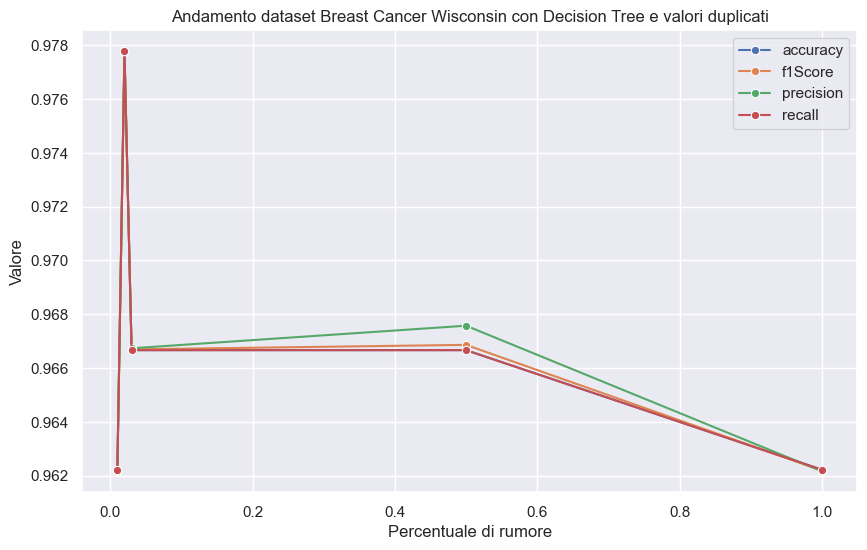

In [43]:
# Converti il dizionario in DataFrame
metrics_df = pd.DataFrame(metricsDuplicate)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.lineplot(data=metrics_df, x='percentuale', y='accuracy', label='accuracy', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='f1_score', label='f1Score', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='precision', label='precision', marker='o')
sns.lineplot(data=metrics_df, x='percentuale', y='recall', label='recall', marker='o')

plt.title('Andamento dataset Breast Cancer Wisconsin con Decision Tree e valori duplicati')
plt.xlabel('Percentuale di rumore')
plt.ylabel('Valore')
plt.legend()
plt.show()

### 7.4 Curva ROC

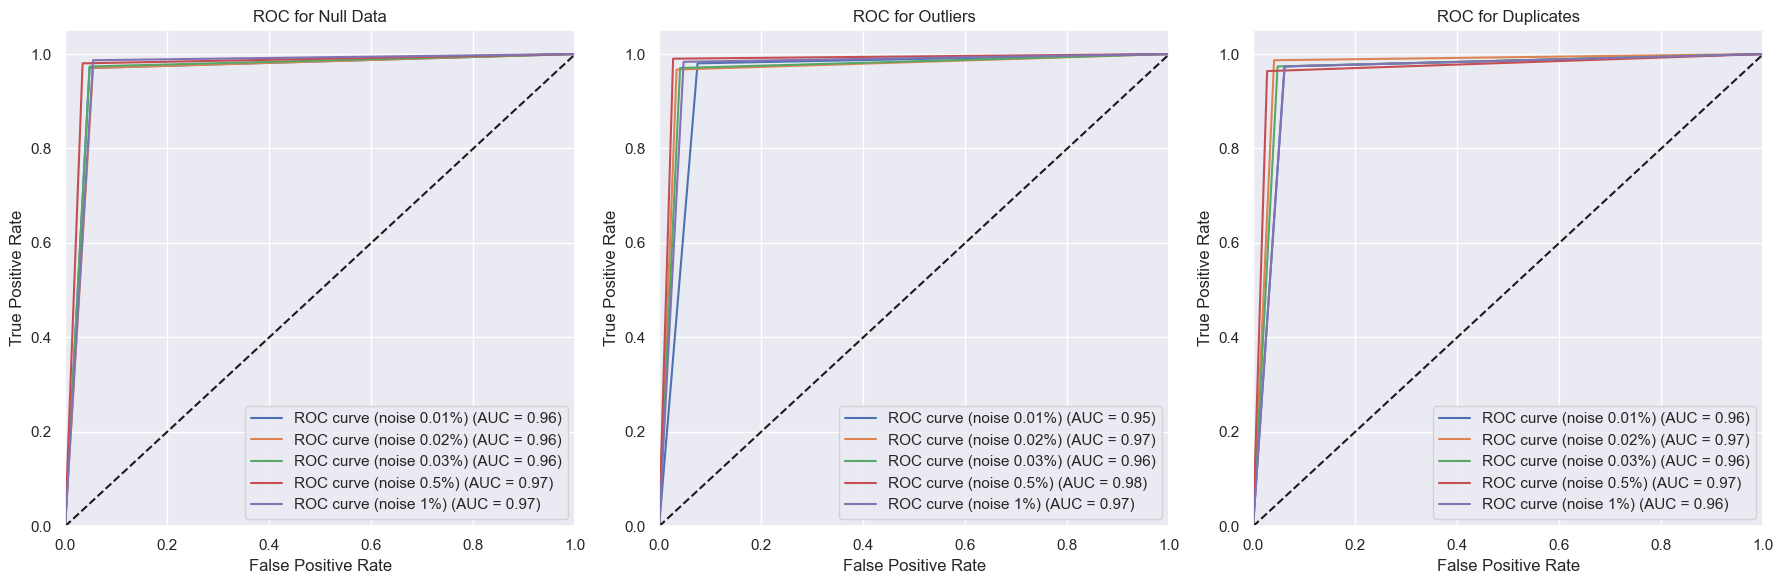

In [44]:
# Crea una figura con 3 subplot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Funzione per tracciare la curva ROC
def plot_roc_curve(ax, metrics, title):
    for i, percentuale in enumerate(metrics['percentuale']):
        ax.plot(metrics['fpr'][i], metrics['tpr'][i], label=f'ROC curve (noise {percentuale}%) (AUC = {metrics["roc_auc"][i]:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')
    ax.grid(True)

# Plot delle curve ROC per ciascuna condizione
plot_roc_curve(axs[0], metricsNUll, 'ROC for Null Data')
plot_roc_curve(axs[1], metricsOutliers, 'ROC for Outliers')
plot_roc_curve(axs[2], metricsDuplicate, 'ROC for Duplicates')

# Mostra la figura
plt.tight_layout()
plt.show()

### 7.5 Conclusione
Avendo ora a disposizione i dati degli esperimenti effettuati si può affermare
che i valori dei parametri di valutazione del modello sono sempre rimasti molto
alti. Analizzando i casi singolarmente, possiamo dire che per quanto riguarda
l’introduzione di righe duplicate le prestazioni del modello rimangono stabili,
con leggere variazioni in determinati intervalli. Questi risultati indicano che
il modello è robusto rispetto alla presenza di righe duplicate, le quali non
sembrano influire negativamente in maniera significativa. Anche con un’alta
percentuale di dati duplicati, il modello mantiene performance stabili, suggerendo che le righe duplicate non rappresentano un problema per le prestazioni,
pur non offrendo un beneficio aggiuntivo oltre una certa soglia.


I casi rimanenti (outliers e righe nulle) seguono, invece, un comportamento
differente. Pur mantenendo prestazioni comunque elevate, il modello presenta
performance altalenanti in entrambi i casi. L’alterazione dei dati con valori
nulli ed outliers sembra quindi influenzare il decision tree, come si può notare
anche dalla variazione delle variabili più importanti: quelle con rilevanza maggiore, perdono importanza a favore di altre feature, portando il modello ad
eseguire la classificazione in base a queste ultime e non più delle feature "sporcate", che vengono sempre meno considerate con l’aumento della percentuale
di presenza di rumore, fino ad essere ignorate.


Nel caso preso in considerazione si può affermare che il mantenimento di prestazioni così elevate è dovuto, oltre che dalla robustezza dell’algoritmo scelto
per il modello, anche ad una alta quantità di variabili con forte correlazione
con il target: ciò consente al modello di non calare di prestazioni con molta
facilità anche a fronte di rumore inserito nelle feature più importanti.
Rimane comunque di vitale importanza la scelta di un dataset che presenti
un rumore nullo o contenuto in quanto un rumore troppo elevato potrebbe
comportare problemi di accuratezza dei risultati e ad ore di troubleshooting
per capire le motivazioni dei risultati ottenuti. In generale siamo contenti dei
risultati ottenuti dal modello e non ci aspettavamo una performance così alta.
Le percentuali al di sopra del 50% possono essere considerate come uno stresstest del modello, in quanto un modello con così tanto rumore non sarebbe un
modello da scegliere o comunque necessiterebbe di tanta pulizia dei dati
